# IMPORT LIBRARIES AND DATASET

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from tabulate import tabulate
from IPython.display import display
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from google.colab import files
import string

df1 = pd.read_csv("/content/job_resumes.csv")
df2 = pd.read_csv("/content/jobstreet_all_job_dataset.csv", engine='python', on_bad_lines='skip')
df1.rename(columns={
    "Category": "category",
    "Text": "descriptions"
}, inplace=True)

# Misalnya dataframe kamu bernama df
df2.drop(columns=[
    'job_id', 'job_title', 'company', 'location', 'subcategory',
    'role', 'type', 'salary', 'listingDate'
], inplace=True)

# Tampilkan df1
print("Dataset Job Resume Classification:")
display(df1)

# Tampilkan df2
print("Jobstreet Dataset")
display(df2)

Dataset Job Resume Classification:


category                                       descriptions
0         Accountant  education omba executive leadership university...
1         Accountant  howard gerrard accountant deyjobcom birmingham...
2         Accountant  kevin frank senior accountant inforesumekraftc...
3         Accountant  place birth nationality olivia ogilvy accounta...
4         Accountant  stephen greet cpa senior accountant 9 year exp...
...              ...                                                ...
13384  Web Designing  jessica claire montgomery street san francisco...
13385  Web Designing  jessica claire montgomery street san francisco...
13386  Web Designing  summary jessica claire 100 montgomery st 10th ...
13387  Web Designing  jessica claire montgomery street san francisco...
13388  Web Designing  websites portfolios profiles professional summ...

[13389 rows x 2 columns]

Jobstreet Dataset


descriptions  \
0      Position Purpose\nManage aspects of procuremen...   
1      We are looking for a Account Executive/ Assist...   
2      Performs detailed data analysis on existing sp...   
3      You are important for troubleshooting, install...   
4      MAG is a trailblazer in the industry, boasting...   
...                                                  ...   
59301  MAIN RESPONSIBILITIES\nSupport the Asia Pacifi...   
59302  Job Descriptions:\nPartner closely with HRBPs ...   
59303  Objective:\nHighly motivated and customer-focu...   
59304  Job Descriptions:\nDelivers sales target for b...   
59305  Join the fastest growing fintech solutions com...   

                                     category  
0        Manufacturing, Transport & Logistics  
1                                  Accounting  
2        Manufacturing, Transport & Logistics  
3                                 Engineering  
4        Manufacturing, Transport & Logistics  
...                                       ...  
59301              Marketing & Communications  
59302           Human Resources & Recruitment  
59303              Insurance & Superannuation  
59304            Banking & Financial Services  
59305  Information & Communication Technology  

[59306 rows x 2 columns]

In [7]:
print("DataFrame 1 (Resume) Information\n")
print(df1.info())

print("\nDataFrame 1 (Resume) Description\n")
print(df1.describe(include='all'))  # include='all' untuk semua tipe data

print("\nDataFrame 2 (Jobstreet) Information\n")
print(df2.info())

print("\nDataFrame 2 (Jobstreet) Description\n")
print(df2.describe(include='all'))

DataFrame 1 (Resume) Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      13389 non-null  object
 1   descriptions  13389 non-null  object
dtypes: object(2)
memory usage: 209.3+ KB
None

DataFrame 1 (Resume) Description

         category                                       descriptions
count       13389                                              13389
unique         43                                              12085
top     Education  jessica claire 100 montgomery st 10th floor 55...
freq          410                                                  5

DataFrame 2 (Jobstreet) Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59306 entries, 0 to 59305
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   descriptions  59306 non-null

# MISSING VALUES

In [8]:
# Cek missing values df1
null_values_df1 = df1.isna().sum().sum()
total_data_df1 = df1.shape[0]
print(f"Classification Resume Dataset: Total Missing Values = {null_values_df1} ({round(null_values_df1/total_data_df1*100, 2)}%)")

# Cek missing values df2
null_values_df2 = df2.isna().sum().sum()
total_data_df2 = df2.shape[0]
print(f"Job Description Dataset: Total Missing Values = {null_values_df2} ({round(null_values_df2/total_data_df2*100, 2)}%)")

Classification Resume Dataset: Total Missing Values = 0 (0.0%)
Job Description Dataset: Total Missing Values = 0 (0.0%)


In [9]:
# Hapus missing values dari df1
df1_rm = df1.dropna()
print("Missing values in Classification Resume Dataset after removal:")
print(df1_rm.isna().sum())

# Hapus missing values dari df2
df2_rm = df2.dropna()
print("\nMissing values in Jobstreet Dataset after removal:")
print(df2_rm.isna().sum())

Missing values in Classification Resume Dataset after removal:
category        0
descriptions    0
dtype: int64

Missing values in Jobstreet Dataset after removal:
descriptions    0
category        0
dtype: int64


# EXPLORE KATEGORI

In [10]:
# Distribusi kategori di df1 (resume)
print("Kategori Job Resume Classification Dataset):")
print(df1_rm['category'].value_counts())

# Distribusi kategori di df2 (Jobstreet)
print("\nKategori Jobstreet Dataset:")
print(df2_rm['category'].value_counts())

Kategori Job Resume Classification Dataset):
category
Education                    410
Electrical Engineering       384
Mechanical Engineer          384
Consultant                   368
Sales                        364
Civil Engineer               364
Management                   361
Human Resources              360
Digital Media                358
Accountant                   350
Java Developer               348
Operations Manager           345
Building and Construction    345
Testing                      344
Architecture                 344
Aviation                     340
Business Analyst             340
Finance                      339
SQL Developer                338
Public Relations             337
Health and Fitness           332
Arts                         332
Network Security Engineer    330
DotNet Developer             329
Apparel                      320
Banking                      314
Automobile                   313
Web Designing                309
SAP Developer         

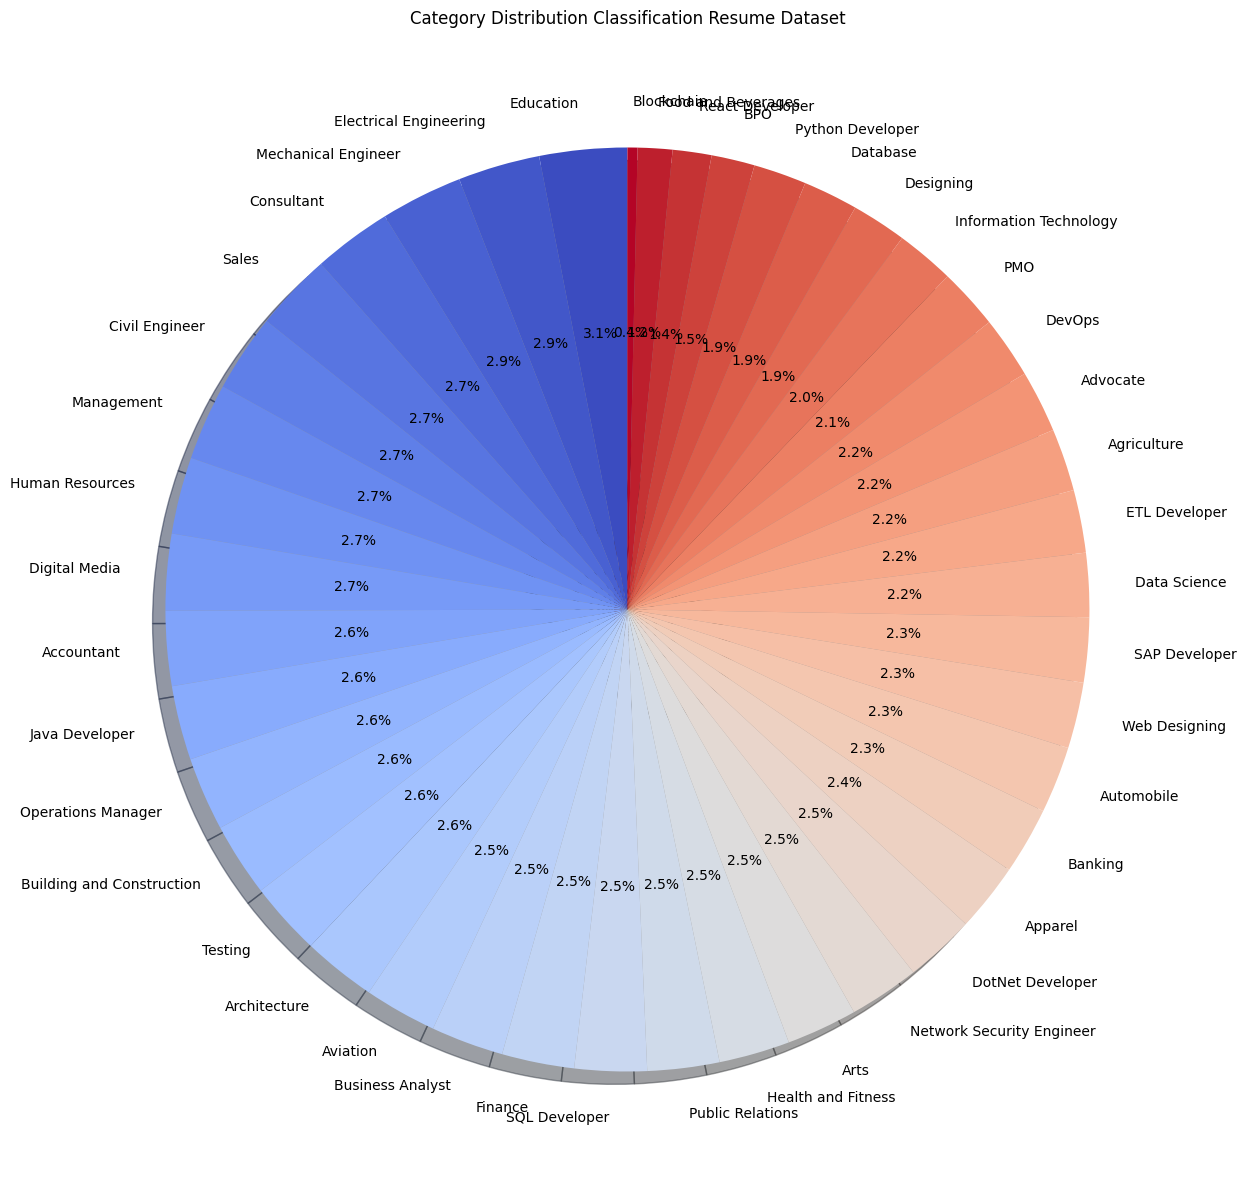

In [11]:
from matplotlib.gridspec import GridSpec

targetCounts_df1 = df1_rm['category'].value_counts()
targetLabels_df1 = targetCounts_df1.index

plt.figure(1, figsize=(15, 15))
the_grid = GridSpec(1, 1)
plt.subplot(the_grid[0, 0], aspect=1, title='Category Distribution Classification Resume Dataset')

# Change this line to directly use the colormap or get colors from it
plt.pie(targetCounts_df1, labels=targetLabels_df1, autopct='%1.1f%%', shadow=True, startangle=90, colors=plt.cm.coolwarm(np.linspace(0, 1, len(targetLabels_df1))))
plt.show()

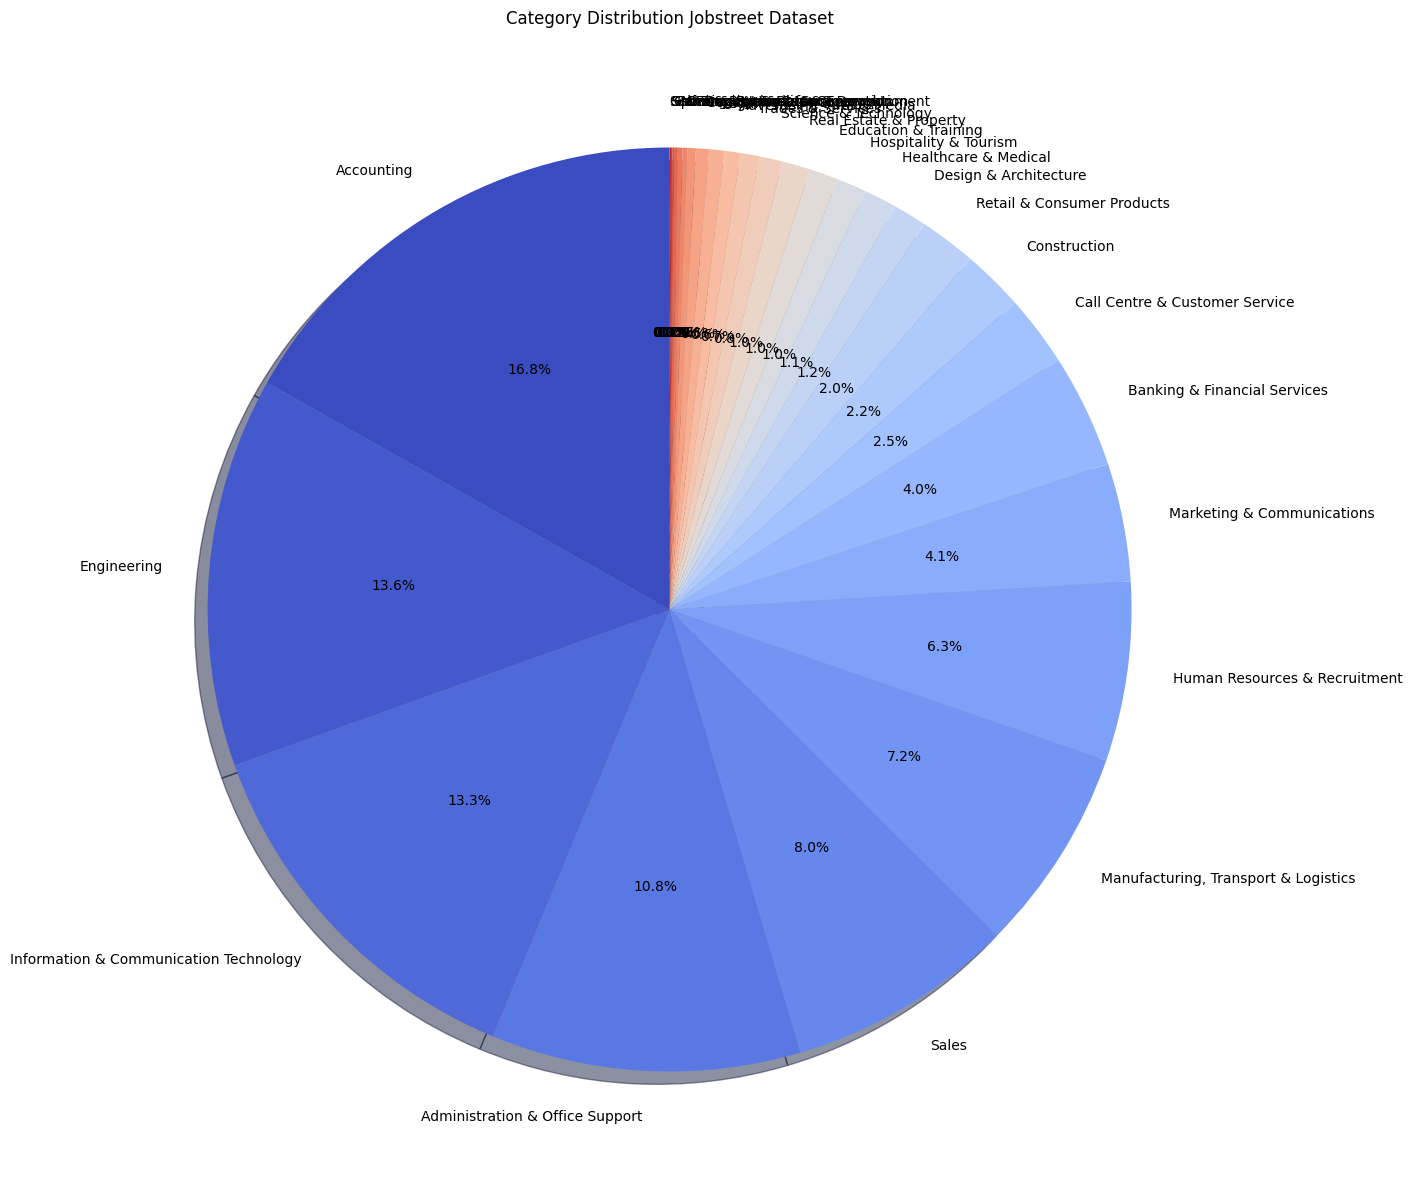

In [12]:
targetCounts_df2 = df2_rm['category'].value_counts()
targetLabels_df2 = targetCounts_df2.index

plt.figure(2, figsize=(15, 15))
the_grid = GridSpec(1, 1)
plt.subplot(the_grid[0, 0], aspect=1, title='Category Distribution Jobstreet Dataset')

# Generate a list of colors from the coolwarm colormap
colors = plt.cm.coolwarm(np.linspace(0, 1, len(targetLabels_df2)))

# Use the generated colors in the pie chart
plt.pie(targetCounts_df2, labels=targetLabels_df2, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

# PREPROCESSING DATA

## CLEANING DATA

In [13]:
def clean_text(text):
    """
    Membersihkan teks:
    - Menghapus URL
    - Menghapus email
    - Menghapus mention dan hashtag
    - Menghapus angka
    - Menghapus tanda baca
    """
    if pd.isna(text):
        return ""

    # Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Hapus email
    text = re.sub(r'\S+@\S+', '', text)
    # Hapus mention dan hashtag
    text = re.sub(r'@\w+|#\w+', '', text)
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def clean_dataframe(df):
    # Assuming 'descriptions' is the column to clean
    df['clean_descriptions'] = df['descriptions'].apply(clean_text)
    return df[['descriptions', 'clean_descriptions']].head()


# Now you should be able to use df1_rm within your clean_dataframe function:
print("DF1:")
display(clean_dataframe(df1_rm))  # Now this should work

print("DF2:")
display(clean_dataframe(df2_rm))

DF1:


descriptions  \
0  education omba executive leadership university...   
1  howard gerrard accountant deyjobcom birmingham...   
2  kevin frank senior accountant inforesumekraftc...   
3  place birth nationality olivia ogilvy accounta...   
4  stephen greet cpa senior accountant 9 year exp...   

                                  clean_descriptions  
0  education omba executive leadership university...  
1  howard gerrard accountant deyjobcom birmingham...  
2  kevin frank senior accountant inforesumekraftc...  
3  place birth nationality olivia ogilvy accounta...  
4  stephen greet cpa senior accountant year exper...

DF2:


descriptions  \
0  Position Purpose\nManage aspects of procuremen...   
1  We are looking for a Account Executive/ Assist...   
2  Performs detailed data analysis on existing sp...   
3  You are important for troubleshooting, install...   
4  MAG is a trailblazer in the industry, boasting...   

                                  clean_descriptions  
0  Position Purpose Manage aspects of procurement...  
1  We are looking for a Account Executive Assista...  
2  Performs detailed data analysis on existing sp...  
3  You are important for troubleshooting installa...  
4  MAG is a trailblazer in the industry boasting ...

## CASE FOLDING

In [14]:
def case_folding(text):
    """
    Mengubah teks menjadi huruf kecil.
    """
    if pd.isna(text):
        return ""
    return text.lower()

def case_dataframe(df):
    if 'clean_descriptions' in df.columns:
        df['case_descriptions'] = df['clean_descriptions'].apply(case_folding)
        return df[['clean_descriptions', 'case_descriptions']].head()

print("DF1:")
display(case_dataframe(df1_rm))  # Now this should work

print("D2:")
display(case_dataframe(df2_rm))

DF1:


clean_descriptions  \
0  education omba executive leadership university...   
1  howard gerrard accountant deyjobcom birmingham...   
2  kevin frank senior accountant inforesumekraftc...   
3  place birth nationality olivia ogilvy accounta...   
4  stephen greet cpa senior accountant year exper...   

                                   case_descriptions  
0  education omba executive leadership university...  
1  howard gerrard accountant deyjobcom birmingham...  
2  kevin frank senior accountant inforesumekraftc...  
3  place birth nationality olivia ogilvy accounta...  
4  stephen greet cpa senior accountant year exper...

D2:


clean_descriptions  \
0  Position Purpose Manage aspects of procurement...   
1  We are looking for a Account Executive Assista...   
2  Performs detailed data analysis on existing sp...   
3  You are important for troubleshooting installa...   
4  MAG is a trailblazer in the industry boasting ...   

                                   case_descriptions  
0  position purpose manage aspects of procurement...  
1  we are looking for a account executive assista...  
2  performs detailed data analysis on existing sp...  
3  you are important for troubleshooting installa...  
4  mag is a trailblazer in the industry boasting ...

## TOKENIZING

In [15]:
def tokenize_text(text):
    """
    Memecah teks menjadi token (kata-kata).
    """
    if pd.isna(text):
        return []
    return word_tokenize(text)

def tokenizing_dataframe(df):
    if 'case_descriptions' in df.columns:
        df['tokenizing_descriptions'] = df['case_descriptions'].apply(case_folding)
        return df[['case_descriptions', 'tokenizing_descriptions']].head()

print("Dataset Job:")
display(tokenizing_dataframe(df1_rm))  # Now this should work

print("Dataset Job IT:")
display(tokenizing_dataframe(df2_rm))

Dataset Job:


case_descriptions  \
0  education omba executive leadership university...   
1  howard gerrard accountant deyjobcom birmingham...   
2  kevin frank senior accountant inforesumekraftc...   
3  place birth nationality olivia ogilvy accounta...   
4  stephen greet cpa senior accountant year exper...   

                             tokenizing_descriptions  
0  education omba executive leadership university...  
1  howard gerrard accountant deyjobcom birmingham...  
2  kevin frank senior accountant inforesumekraftc...  
3  place birth nationality olivia ogilvy accounta...  
4  stephen greet cpa senior accountant year exper...

Dataset Job IT:


case_descriptions  \
0  position purpose manage aspects of procurement...   
1  we are looking for a account executive assista...   
2  performs detailed data analysis on existing sp...   
3  you are important for troubleshooting installa...   
4  mag is a trailblazer in the industry boasting ...   

                             tokenizing_descriptions  
0  position purpose manage aspects of procurement...  
1  we are looking for a account executive assista...  
2  performs detailed data analysis on existing sp...  
3  you are important for troubleshooting installa...  
4  mag is a trailblazer in the industry boasting ...

## STOPWORD REMOVAL

In [16]:
nltk.download('stopwords')

# Set stopwords
stop_words = set(stopwords.words('english'))

# Daftar nama orang yang mau dihapus (bisa kamu tambah)
nama_orang = set([
    'jessica', 'claire', 'stephen', 'olivia', 'kevin', 'howard', 'frank', 'olivia', 'st', 'th', 'newyork',
    'greet', 'gerrard', 'san', 'francisco', 'ca', 'street', 'include', 'city','state', 'montgomery'  # tambahkan jika ada yang spesifik
])

# Gabungkan stopwords dan nama orang jadi satu set
kata_terlarang = stop_words.union(nama_orang)

def remove_stopwords_and_names(text):
    if pd.isna(text):
        return ""
    words = text.split()
    words = [word for word in words if word not in kata_terlarang]
    return " ".join(words)

def stopword_dataframe(df):
    if 'tokenizing_descriptions' in df.columns:
        df['stopword_descriptions'] = df['tokenizing_descriptions'].apply(remove_stopwords_and_names)
        return df[['tokenizing_descriptions', 'stopword_descriptions']].head()

# Tampilkan hasil
print("DF1:")
display(stopword_dataframe(df1_rm))

print("DF2:")
display(stopword_dataframe(df2_rm))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


DF1:


tokenizing_descriptions  \
0  education omba executive leadership university...   
1  howard gerrard accountant deyjobcom birmingham...   
2  kevin frank senior accountant inforesumekraftc...   
3  place birth nationality olivia ogilvy accounta...   
4  stephen greet cpa senior accountant year exper...   

                               stopword_descriptions  
0  education omba executive leadership university...  
1  accountant deyjobcom birmingham infodayjobcom ...  
2  senior accountant inforesumekraftcom chicago i...  
3  place birth nationality ogilvy accountant paci...  
4  cpa senior accountant year experience establis...

DF2:


tokenizing_descriptions  \
0  position purpose manage aspects of procurement...   
1  we are looking for a account executive assista...   
2  performs detailed data analysis on existing sp...   
3  you are important for troubleshooting installa...   
4  mag is a trailblazer in the industry boasting ...   

                               stopword_descriptions  
0  position purpose manage aspects procurement in...  
1  looking account executive assistant join team ...  
2  performs detailed data analysis existing spend...  
3  important troubleshooting installation mainten...  
4  mag trailblazer industry boasting extensive tr...

## LEMMATIZATION

In [17]:
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if pd.isna(text):
        return ""
    words = text.split()
    words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]
    words = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in words]
    words = [re.sub(r'(?<!s)s$', '', word) for word in words]
    words = [re.sub(r'(?<!e)es$', '', word) for word in words]
    words = [re.sub(r'(?<!e)ly$', '', word) for word in words]
    return " ".join(words)

def lemmatize_dataframe(df):
    if 'stopword_descriptions' in df.columns:
        df['lemma_descriptions'] = df['stopword_descriptions'].apply(lemmatize_text)
        return df[['stopword_descriptions', 'lemma_descriptions']].head()

# Tampilkan hasil
print("DF1:")
display(lemmatize_dataframe(df1_rm))

print("DF2:")
display(lemmatize_dataframe(df2_rm))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


DF1:


stopword_descriptions  \
0  education omba executive leadership university...   
1  accountant deyjobcom birmingham infodayjobcom ...   
2  senior accountant inforesumekraftcom chicago i...   
3  place birth nationality ogilvy accountant paci...   
4  cpa senior accountant year experience establis...   

                                  lemma_descriptions  
0  education omba executive leadership university...  
1  accountant deyjobcom birmingham infodayjobcom ...  
2  senior accountant inforesumekraftcom chicago i...  
3  place birth nationality ogilvy accountant paci...  
4  cpa senior accountant year experience establis...

DF2:


stopword_descriptions  \
0  position purpose manage aspects procurement in...   
1  looking account executive assistant join team ...   
2  performs detailed data analysis existing spend...   
3  important troubleshooting installation mainten...   
4  mag trailblazer industry boasting extensive tr...   

                                  lemma_descriptions  
0  position purpose manage aspect procurement inc...  
1  look account executive assistant join team get...  
2  perform detail data analysi exist spending con...  
3  important troubleshoot installation maintenanc...  
4  mag trailblazer industry boast extensive track...

## FINAL TEXT

In [18]:
def tampilkan_pipeline(df, nama_df):
    """
    Menampilkan 5 data pertama dari setiap tahapan preprocessing untuk DataFrame yang diberikan.
    """
    if not all(col in df.columns for col in ['descriptions', 'clean_descriptions', 'case_descriptions',
                                              'tokenizing_descriptions', 'stopword_descriptions', 'lemma_descriptions']):
        raise ValueError(f"DataFrame '{nama_df}' belum memiliki semua kolom hasil preprocessing.")

    # Gabungkan semua kolom yang ingin ditampilkan
    result = df[['descriptions', 'clean_descriptions', 'case_descriptions',
                 'tokenizing_descriptions', 'stopword_descriptions', 'lemma_descriptions']].head(1)

    print(f"\n=== {nama_df} ===")
    pd.set_option('display.max_colwidth', None)
    display(result)

print("DF1:")
# Call tampilkan_pipeline instead of final_dataframe and provide the dataframe name
display(tampilkan_pipeline(df1_rm, "DF1"))

print("DF2:")
# Call tampilkan_pipeline instead of final_dataframe and provide the dataframe name
display(tampilkan_pipeline(df2_rm, "DF2"))

DF1:

=== DF1 ===


descriptions  \
0  education omba executive leadership university texas 20162018 bachelor science accounting richland college 20052008 training certifications certified management accountant cma certified financial modeling valuation analyst compliance antimoney laundering 092016 american institute banking certified public account cpa lean six sigma green belt certified trade products financial regulations 082016 american institute banking achievements speaker bringing leader within 082019 successfully presented empowering speech leadership 500 participants speaker dallas convention cpas 032019 successfully delivered seminar 3k cpas convention guests teaching experience online teacher udemy 2017 taught online accounting nonaccountant course udemy similar online teaching platforms developed effective teaching modules materials curriculum target students took feedbacks students assist improving teaching methodology materials professional memberships affiliations american society executives 2018 present technical skills quickbooks erp sap oracle hyperion languages english native fellow chartered accountant 2011 present ms office sql ibm cognos german spanish french full professional proficiency limited working proficiency limited working proficiency interests artificial intelligence chess nnovoresumecom sailing cryptocurrencies page 2 2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   clean_descriptions  \
0  education omba executive leadership university texas bachelor science accounting richland college training certifications certified management accountant cma certified financial modeling valuation analyst compliance antimoney laundering american institute banking certified public account cpa lean six sigma green belt certified trade products financial regulations american institute banking achievements speaker bringing leader within successfully presented empowering speech leadership participants speaker dallas convention cpas successfully delivered seminar k cpas convention guests teaching experience online teacher udemy taught online accounting nonaccountant course udemy similar online teaching platforms developed effective teaching modules materials curriculum target students took feedbacks students assist improving teaching methodology materials professional memberships affiliations american society executives present technical skills quickbooks erp sap oracle hyperion languages english native fellow chartered accountant present ms office sql ibm cognos german spanish french full professional proficiency limited working proficiency limited working proficiency interests artificial intelligence chess nnovoresumecom sailing cryptocurrencies page   

                                                                                             

None

DF2:

=== DF2 ===


descriptions  \
0  Position Purpose\nManage aspects of procurement including supplier management, contract management, and vendor performance tracking. Support the administration and management of procurement processes. This includes setting up, maintaining, and administering purchasing databases; developing and issuing purchase orders; maintain contract log and providing support to other departments within the organization who are involved in procurement.\nKey Duties / Responsibilities\nGeneral\nEnsure the PO created following the bidding requirements\nOA updates from time to time - upon request from planning team / buyers\nGeographical coverage: Malaysia and Singapore operations\nEnsure all purchasing activities comply with Procurement Procedure and company internal policy\nActively seek out opportunities for improvement, ways to do things better; and lead implementation of actions defined\nManage reports and reviews\nManage reports and reviews weekly, monthly and quarterly accordingly\nContract Log Update; Ensure expiring / expired contracts are renewed on time; Safekeeping of contracts softcopy\nActive and Inactive Vendor Code Cleansing on quarterly basis\nSupplier management:\nDefine and implement strategy for supplier management to ensure reliability in consistently meeting requirements, quality control and product performance per contract, continuous improvement in cost, quality and service.\nVendor Creation follows the policy and acknowledgment from respective buyers\nDocumentation and Audit:\nKeep record of PAF, PAF approvals, Bidding documents, Contracts softcopies\nWork closely with Legal in contract storage and contract log\nKeep track on all report as evidence for audit.\nRequirements / Qualifications\nEducation:\nBachelor Degree preferably in procurement and/or supply chain related field. Professional knowledge of procurement practices, supply markets, terms, negotiation concepts and business laws.\nExperience:\n1-2 years’ experience relevant experience in FMCG/beverage manufacturing environment or any other related field with a strong procurement background in Malaysia.\nLanguage\n: Bahasa Melayu/ English\nWork Location\n: Bandar Enstek (Negeri Sembilan)\nEmployment\n: 12 months Contract\nWith Regret , only shortlisted candidate will be notified.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

None

# WORD CLOUD

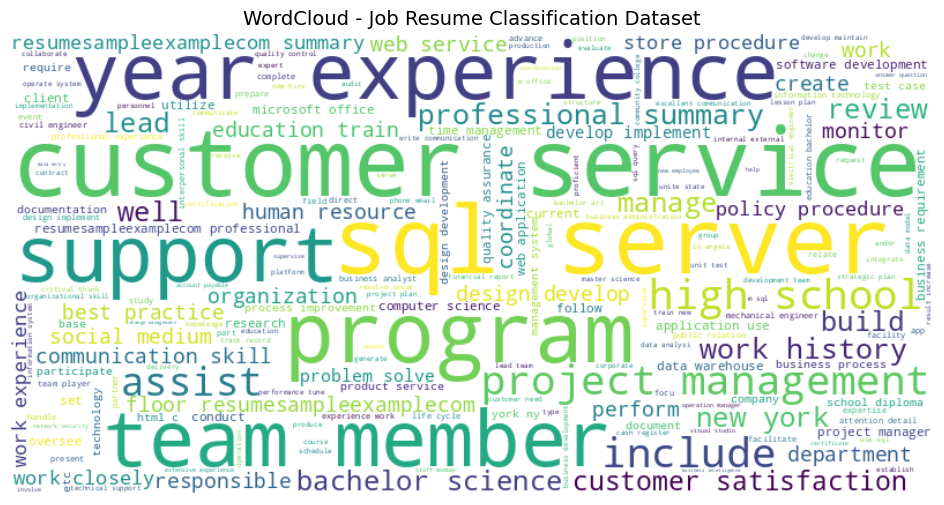

In [19]:
# Gabungkan semua teks dalam kolom lemma_descriptions, abaikan missing values
text_data_df1 = " ".join(df1_rm['lemma_descriptions'].dropna())

# Generate wordcloud
wordcloud_df1 = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', max_words=200).generate(text_data_df1)

# Tampilkan gambar
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_df1, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Job Resume Classification Dataset", fontsize=14)
plt.show()

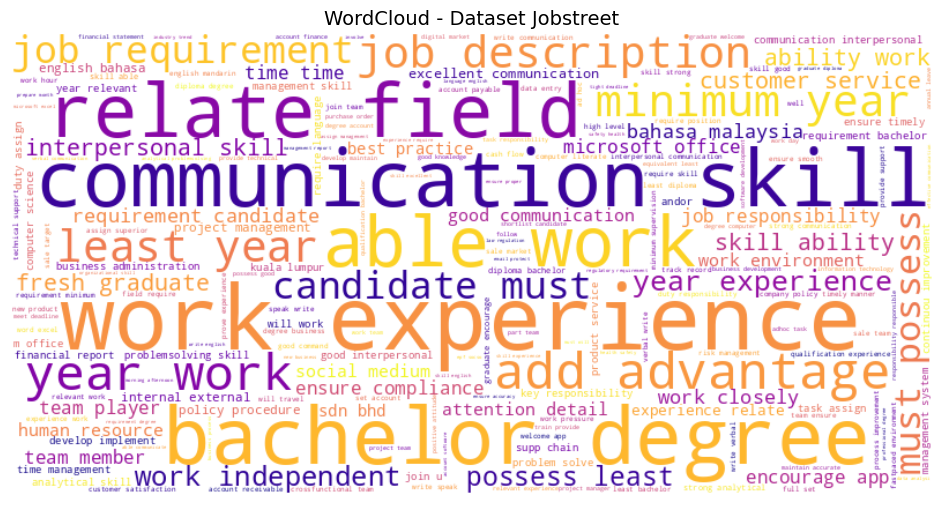

In [20]:
text_data_df2 = " ".join(df2_rm['lemma_descriptions'].dropna())

wordcloud_df2 = WordCloud(width=800, height=400, background_color='white', colormap='plasma', max_words=200).generate(text_data_df2)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_df2, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Dataset Jobstreet", fontsize=14)
plt.show()

# LABEL ENCODING

In [21]:
train_set, test_set = train_test_split(df1_rm, test_size=0.2, random_state=42, stratify=df1_rm['category'])

In [22]:
label_encoder = LabelEncoder()

# Encode kategori
train_set['category_encoded'] = label_encoder.fit_transform(train_set['category'])
test_set['category_encoded'] = label_encoder.transform(test_set['category'])

# Buat tabel mapping kategori
category_mapping = pd.DataFrame({
    'category': label_encoder.classes_,
    'category_encoded': range(len(label_encoder.classes_))
})

print("Mapping kategori:")
print(category_mapping)

Mapping kategori:
                     category  category_encoded
0                  Accountant                 0
1                    Advocate                 1
2                 Agriculture                 2
3                     Apparel                 3
4                Architecture                 4
5                        Arts                 5
6                  Automobile                 6
7                    Aviation                 7
8                         BPO                 8
9                     Banking                 9
10                 Blockchain                10
11  Building and Construction                11
12           Business Analyst                12
13             Civil Engineer                13
14                 Consultant                14
15               Data Science                15
16                   Database                16
17                  Designing                17
18                     DevOps                18
19              Digita

In [23]:
train_set, test_set = train_test_split(df2_rm, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import OrdinalEncoder
label_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Encode kategori
train_set['category_encoded'] = label_encoder.fit_transform(train_set[['category']]).astype(int)
test_set['category_encoded'] = label_encoder.transform(test_set[['category']]).astype(int)

# Buat tabel mapping kategori
category_mapping = pd.DataFrame({
    'category': label_encoder.categories_[0],
    'category_encoded': range(len(label_encoder.categories_[0]))
})

print("Mapping kategori:")
print(category_mapping)

Mapping kategori:
                                  category  category_encoded
0                               Accounting                 0
1          Administration & Office Support                 1
2                Advertising, Arts & Media                 2
3             Banking & Financial Services                 3
4                 CEO & General Management                 4
5           Call Centre & Customer Service                 5
6         Community Services & Development                 6
7                             Construction                 7
8                    Consulting & Strategy                 8
9                    Design & Architecture                 9
10                    Education & Training                10
11                             Engineering                11
12         Farming, Animals & Conservation                12
13                    Government & Defence                13
14                    Healthcare & Medical                14
15    

# TF-IDF

In [25]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# --- For df1 (Resume) ---
# Ensure df1_rm has 'category_encoded' column
label_encoder_df1 = LabelEncoder()  # Create a separate LabelEncoder for df1
df1_rm['category_encoded'] = label_encoder_df1.fit_transform(df1_rm['category'])

# Split df1_rm into train and test sets
train_set_df1, test_set_df1 = train_test_split(df1_rm, test_size=0.2, random_state=42, stratify=df1_rm['category'])

# *** Get the 'final_text' column which contains the preprocessed text as a single string ***
X_train_df1 = train_set_df1['lemma_descriptions']
X_test_df1 = test_set_df1['lemma_descriptions']

# Training and transforming for df1
X_train_tfidf_df1 = pd.DataFrame(vectorizer.fit_transform(X_train_df1).toarray(),
                                   columns=vectorizer.get_feature_names_out())
X_test_tfidf_df1 = pd.DataFrame(vectorizer.transform(X_test_df1).toarray(),
                                  columns=vectorizer.get_feature_names_out())

print("TF-IDF Vectorization for Classification Resume Dataset Selesai")
print("Dimensi Matrix TF-IDF Data Train Classification Resume Dataset:", X_train_tfidf_df1.shape)
print("Dimensi Matrix TF-IDF Data Test Classification Resume Dataset:", X_test_tfidf_df1.shape)

# --- For df2 (Jobstreet) ---
# Re-initialize vectorizer if needed
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# *** Get the 'final_text' column for df2 ***
X_train_df2 = train_set['lemma_descriptions']  # Use the existing train_set from df2_rm
X_test_df2 = test_set['lemma_descriptions']   # Use the existing test_set from df2_rm

X_train_tfidf_df2 = pd.DataFrame(vectorizer.fit_transform(X_train_df2).toarray(),
                                   columns=vectorizer.get_feature_names_out())
X_test_tfidf_df2 = pd.DataFrame(vectorizer.transform(X_test_df2).toarray(),
                                  columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Vectorization for Jobstreet Dataset Selesai")
print("Dimensi Matrix TF-IDF Data Train Jobstreet Dataset:", X_train_tfidf_df2.shape)
print("Dimensi Matrix TF-IDF Data Test Jobstreet Dataset:", X_test_tfidf_df2.shape)

TF-IDF Vectorization for Classification Resume Dataset Selesai
Dimensi Matrix TF-IDF Data Train Classification Resume Dataset: (10711, 1000)
Dimensi Matrix TF-IDF Data Test Classification Resume Dataset: (2678, 1000)

TF-IDF Vectorization for Jobstreet Dataset Selesai
Dimensi Matrix TF-IDF Data Train Jobstreet Dataset: (47444, 1000)
Dimensi Matrix TF-IDF Data Test Jobstreet Dataset: (11862, 1000)


# FEATURE SELECTION

In [26]:
from sklearn.feature_selection import SelectKBest, chi2

k_best_features_count = 500  # Atur jumlah fitur terpilih

# --- DF1 ---
selector_df1 = SelectKBest(score_func=chi2, k=k_best_features_count)

# y untuk df1
y_train_df1 = train_set_df1['category_encoded']
y_test_df1 = test_set_df1['category_encoded']

# Fit transform ke training
X_train_selected_df1 = selector_df1.fit_transform(X_train_tfidf_df1, y_train_df1)

# Mask fitur yang dipilih
mask_df1 = selector_df1.get_support()

# Apply mask ke test data
X_test_selected_df1 = X_test_tfidf_df1.loc[:, mask_df1]

# Ambil nama fitur
selected_features_df1 = vectorizer.get_feature_names_out()[mask_df1]

# Konversi kembali jadi DataFrame
X_train_selected_df1 = pd.DataFrame(X_train_selected_df1, columns=selected_features_df1)
X_test_selected_df1 = pd.DataFrame(X_test_selected_df1, columns=selected_features_df1)

print("\nFeature Selection untuk Classification Resume Dataset selesai")
print("Train shape Classification Resume Dataset:", X_train_selected_df1.shape)
print("Test shape  Classification Resume Dataset:", X_test_selected_df1.shape)


Feature Selection untuk Classification Resume Dataset selesai
Train shape Classification Resume Dataset: (10711, 500)
Test shape  Classification Resume Dataset: (2678, 500)


In [27]:
# --- DF2 ---
selector_df2 = SelectKBest(score_func=chi2, k=k_best_features_count)

# Pastikan ambil label dari df2 (kategori sudah encoded sebelumnya)
y_train_df2 = train_set['category_encoded']
y_test_df2 = test_set['category_encoded']

# Fit transform ke training
X_train_selected_df2 = selector_df2.fit_transform(X_train_tfidf_df2, y_train_df2)

# Mask fitur yang dipilih
mask_df2 = selector_df2.get_support()

# Apply mask ke test data
X_test_selected_df2 = X_test_tfidf_df2.loc[:, mask_df2]

# Ambil nama fitur
selected_features_df2 = vectorizer.get_feature_names_out()[mask_df2]

# Konversi kembali jadi DataFrame
X_train_selected_df2 = pd.DataFrame(X_train_selected_df2, columns=selected_features_df2)
X_test_selected_df2 = pd.DataFrame(X_test_selected_df2, columns=selected_features_df2)

print("\nFeature Selection untuk Jobstreet Dataset selesai")
print("Train shape Jobstreet Dataset:", X_train_selected_df2.shape)
print("Test shape  Jobstreet Dataset:", X_test_selected_df2.shape)


Feature Selection untuk Jobstreet Dataset selesai
Train shape Jobstreet Dataset: (47444, 500)
Test shape  Jobstreet Dataset: (11862, 500)


# CLASS BALANCING

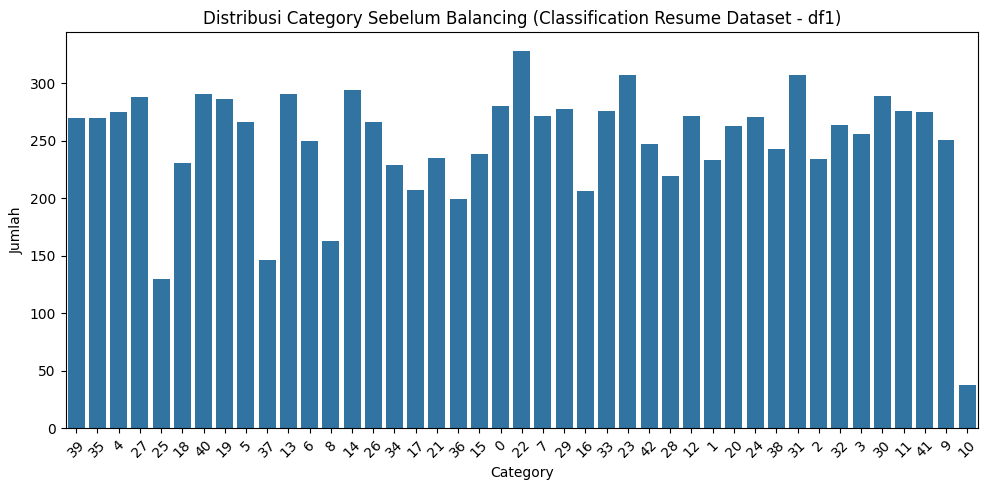

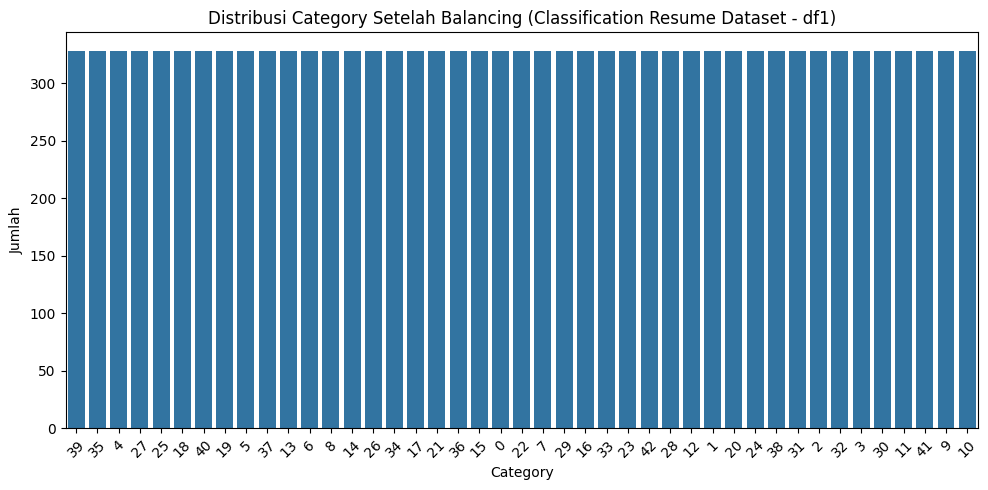

In [28]:
# Reset index sebelum balancing
X_train_reset = X_train_selected_df1.reset_index(drop=True)
y_train_reset = y_train_df1.reset_index(drop=True)

# Random oversampling
ros_df1 = RandomOverSampler(random_state=42)
X_resampled_array, y_resampled_array = ros_df1.fit_resample(X_train_reset.values, y_train_reset.values)

# Konversi hasil resampling ke DataFrame dan Series
X_resampled_df1 = pd.DataFrame(X_resampled_array, columns=X_train_selected_df1.columns)
y_resampled_df1 = pd.Series(y_resampled_array, name='category')  # atau sesuaikan dengan nama kolom targetmu

# Visualisasi sebelum balancing
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_reset.astype(str))
plt.title('Distribusi Category Sebelum Balancing (Classification Resume Dataset - df1)')
plt.xlabel('Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi setelah balancing
plt.figure(figsize=(10, 5))
sns.countplot(x=y_resampled_df1.astype(str))
plt.title('Distribusi Category Setelah Balancing (Classification Resume Dataset - df1)')
plt.xlabel('Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

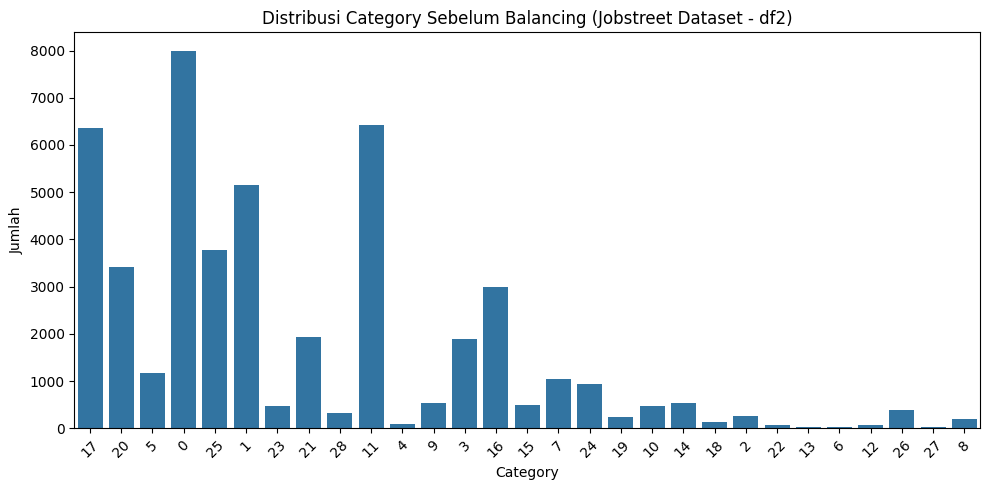

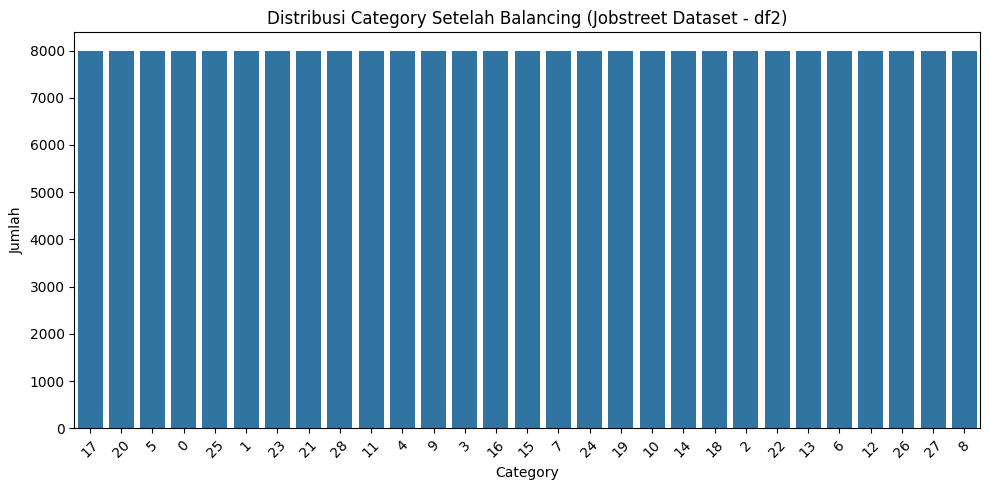

In [29]:
# Reset index sebelum balancing
X_train_reset = X_train_selected_df2.reset_index(drop=True)
y_train_reset = y_train_df2.reset_index(drop=True)

# Random oversampling
ros_df2 = RandomOverSampler(random_state=42)
X_resampled_array, y_resampled_array = ros_df2.fit_resample(X_train_reset.values, y_train_reset.values)

# Konversi hasil resampling ke DataFrame dan Series
X_resampled_df2 = pd.DataFrame(X_resampled_array, columns=X_train_selected_df2.columns)
y_resampled_df2 = pd.Series(y_resampled_array, name='category')  # atau sesuaikan dengan nama kolom targetmu

# Visualisasi sebelum balancing
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_reset.astype(str))
plt.title('Distribusi Category Sebelum Balancing (Jobstreet Dataset - df2)')
plt.xlabel('Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi setelah balancing
plt.figure(figsize=(10, 5))
sns.countplot(x=y_resampled_df2.astype(str))
plt.title('Distribusi Category Setelah Balancing (Jobstreet Dataset - df2)')
plt.xlabel('Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MODELLING KNN

In [30]:
# Range nilai k yang diuji
k_values = range(1, 6)

# Placeholder untuk menyimpan skor rata-rata
mean_scores_df1 = []
mean_scores_df2 = []

# Dataset Resume (df1)
print("Classification Resume Dataset")

for k in k_values:
    print(f"\nk = {k}")
    knn_df1 = KNeighborsClassifier(n_neighbors=k)
    cv = KFold(n_splits=10, shuffle=True, random_state=42)

    fold_accuracies = []
    all_y_true = []
    all_y_pred = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X_resampled_df1, y_resampled_df1)):
        X_train = X_resampled_df1.iloc[train_idx]
        X_test = X_resampled_df1.iloc[test_idx]
        y_train = y_resampled_df1.iloc[train_idx]
        y_test = y_resampled_df1.iloc[test_idx]

        knn_df1.fit(X_train, y_train)
        y_pred = knn_df1.predict(X_test)

        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        accuracy = (y_pred == y_test).mean()
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        precision = report_dict["weighted avg"]["precision"]
        recall = report_dict["weighted avg"]["recall"]
        f1 = report_dict["weighted avg"]["f1-score"]
        fold_accuracies.append(accuracy)

        print(f"\nFold {fold_idx + 1}")
        print(f"Accuracy : {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall   : {recall:.4f}")
        print(f"F1-Score : {f1:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y_resampled_df1),
                    yticklabels=np.unique(y_resampled_df1))
        plt.title(f'Confusion Matrix k={k}, Fold {fold_idx + 1} (Resume Dataset)')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    print(f"\nOverall Classification Report for k={k}")
    print(classification_report(all_y_true, all_y_pred))

    scores = cross_val_score(knn_df1, X_resampled_df1, y_resampled_df1, cv=cv, scoring='accuracy')
    mean_scores_df1.append(scores.mean())

optimal_k_df1_index = np.argmax(mean_scores_df1)
optimal_k_df1 = k_values[optimal_k_df1_index]
best_accuracy_df1 = mean_scores_df1[optimal_k_df1_index]

print(f"\nOptimal k for Resume Dataset: {optimal_k_df1}")
print(f"Best Mean Accuracy: {best_accuracy_df1:.4f}")

# Dataset Job Description (df2)
print("\nClassification Jobstreet Dataset")

for k in k_values:
    print(f"\nk = {k}")
    knn_df2 = KNeighborsClassifier(n_neighbors=k)
    cv = KFold(n_splits=10, shuffle=True, random_state=42)

    fold_accuracies = []
    all_y_true = []
    all_y_pred = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X_resampled_df2, y_resampled_df2)):
        X_train = X_resampled_df2.iloc[train_idx]
        X_test = X_resampled_df2.iloc[test_idx]
        y_train = y_resampled_df2.iloc[train_idx]
        y_test = y_resampled_df2.iloc[test_idx]

        knn_df2.fit(X_train, y_train)
        y_pred = knn_df2.predict(X_test)

        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        accuracy = (y_pred == y_test).mean()
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        precision = report_dict["weighted avg"]["precision"]
        recall = report_dict["weighted avg"]["recall"]
        f1 = report_dict["weighted avg"]["f1-score"]
        fold_accuracies.append(accuracy)

        print(f"\nFold {fold_idx + 1}")
        print(f"Accuracy : {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall   : {recall:.4f}")
        print(f"F1-Score : {f1:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y_resampled_df2),
                    yticklabels=np.unique(y_resampled_df2))
        plt.title(f'Confusion Matrix k={k}, Fold {fold_idx + 1} (Jobstreet Dataset)')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    print(f"\nOverall Classification Report for k={k}")
    print(classification_report(all_y_true, all_y_pred))

    scores = cross_val_score(knn_df2, X_resampled_df2, y_resampled_df2, cv=cv, scoring='accuracy')
    mean_scores_df2.append(scores.mean())

optimal_k_df2_index = np.argmax(mean_scores_df2)
optimal_k_df2 = k_values[optimal_k_df2_index]
best_accuracy_df2 = mean_scores_df2[optimal_k_df2_index]

print(f"\nOptimal k for Jobstreet Dataset: {optimal_k_df2}")
print(f"Best Mean Accuracy: {best_accuracy_df2:.4f}")

Output hidden; open in https://colab.research.google.com to view.

# MODELLING RANDOM FOREST

Classification Resume Dataset

Fold 1
Accuracy : 0.8795
Precision: 0.8846
Recall   : 0.8795
F1-Score : 0.8779
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       0.69      0.96      0.81        26
           2       0.87      0.79      0.83        34
           3       0.82      0.79      0.81        34
           4       0.92      0.92      0.92        25
           5       0.88      0.91      0.90        33
           6       0.90      0.74      0.81        35
           7       0.92      1.00      0.96        36
           8       0.98      0.93      0.95        45
           9       0.89      0.89      0.89        37
          10       1.00      1.00      1.00        25
          11       0.83      0.95      0.88        40
          12       1.00      0.97      0.98        32
          13       0.95      0.93      0.94        42
          14       0.85      0.61      0.71        36
          15       0.88  

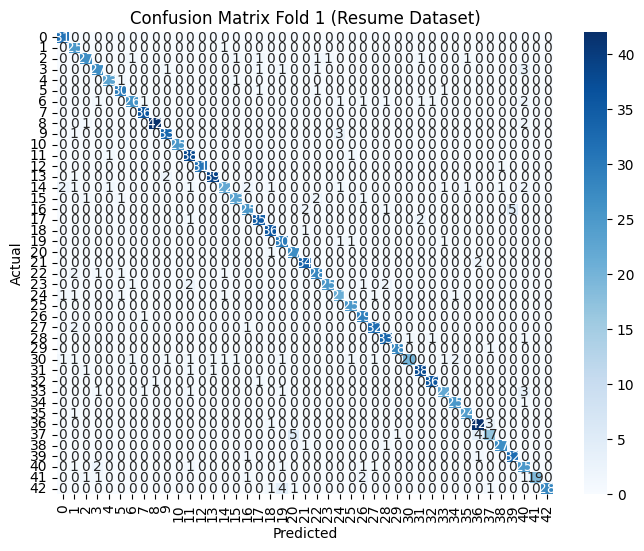


Fold 2
Accuracy : 0.8469
Precision: 0.8523
Recall   : 0.8469
F1-Score : 0.8441
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        40
           1       0.76      0.84      0.80        31
           2       0.94      0.91      0.93        35
           3       0.81      0.64      0.71        33
           4       1.00      0.78      0.88        45
           5       0.92      0.85      0.88        27
           6       0.82      0.82      0.82        22
           7       0.89      1.00      0.94        39
           8       0.93      0.71      0.81        35
           9       0.78      0.96      0.86        26
          10       1.00      1.00      1.00        22
          11       0.89      0.89      0.89        37
          12       0.91      0.86      0.89        36
          13       0.93      0.96      0.94        26
          14       0.70      0.53      0.60        30
          15       0.79      0.85      0.82        27
 

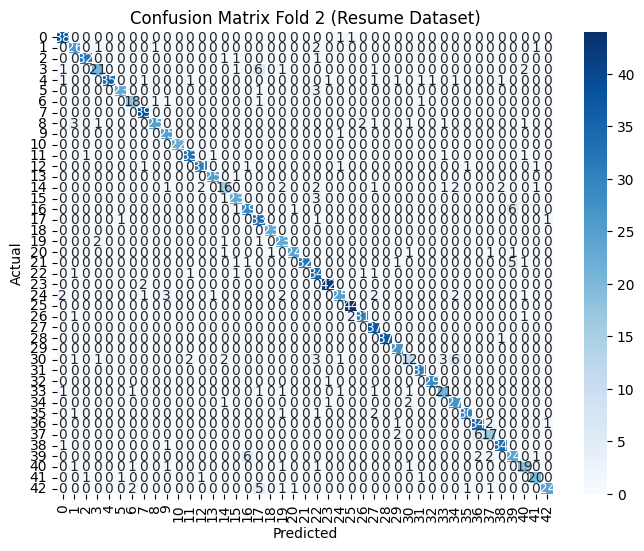


Fold 3
Accuracy : 0.8526
Precision: 0.8586
Recall   : 0.8526
F1-Score : 0.8523
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.59      0.87      0.70        31
           2       0.96      0.79      0.86        28
           3       0.60      0.69      0.64        26
           4       0.91      0.84      0.87        37
           5       0.94      0.87      0.90        38
           6       0.91      0.75      0.82        40
           7       0.87      0.96      0.92        28
           8       0.92      0.79      0.85        29
           9       0.68      0.79      0.73        29
          10       1.00      1.00      1.00        41
          11       0.65      0.71      0.68        24
          12       0.92      0.92      0.92        38
          13       0.97      0.92      0.94        36
          14       0.86      0.69      0.76        35
          15       0.97      0.93      0.95        40
 

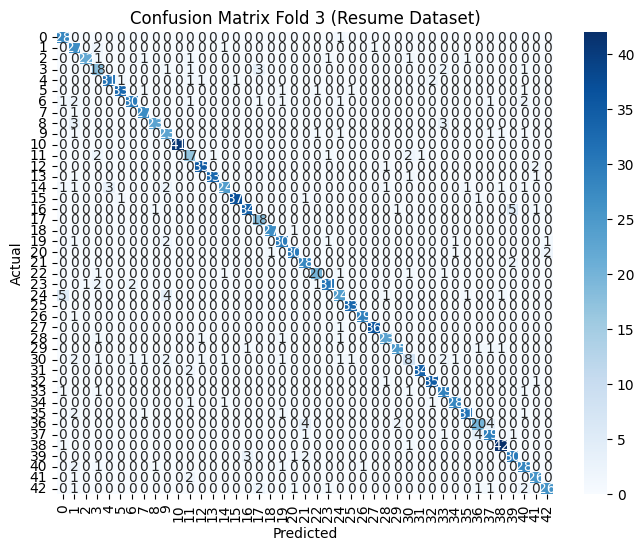


Fold 4
Accuracy : 0.8746
Precision: 0.8778
Recall   : 0.8746
F1-Score : 0.8730
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.62      0.87      0.72        30
           2       0.84      0.74      0.79        35
           3       0.81      0.84      0.83        31
           4       1.00      0.78      0.88        37
           5       0.93      0.95      0.94        40
           6       0.86      0.86      0.86        36
           7       0.92      1.00      0.96        35
           8       0.92      0.88      0.90        25
           9       0.82      0.86      0.84        36
          10       1.00      1.00      1.00        29
          11       0.82      0.93      0.88        30
          12       0.88      0.92      0.90        25
          13       0.94      0.94      0.94        32
          14       0.78      0.58      0.67        31
          15       0.90      0.81      0.85        32
 

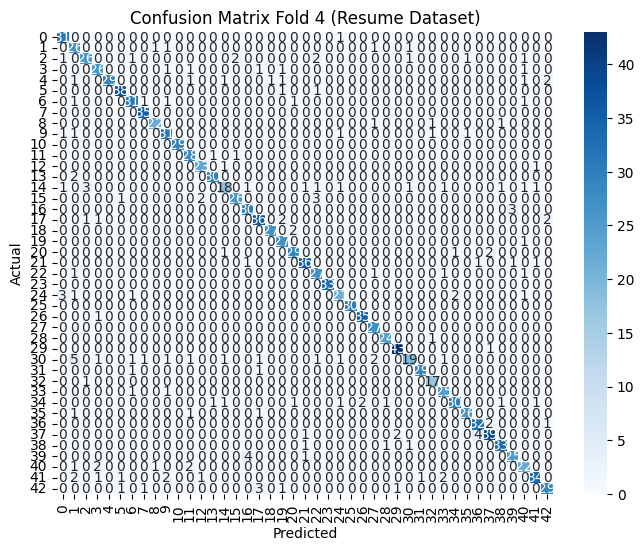


Fold 5
Accuracy : 0.8652
Precision: 0.8683
Recall   : 0.8652
F1-Score : 0.8622
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.76      0.88      0.82        33
           2       0.93      0.82      0.87        33
           3       0.70      0.89      0.78        35
           4       0.86      0.73      0.79        26
           5       0.86      0.84      0.85        37
           6       0.90      0.72      0.80        36
           7       0.87      1.00      0.93        27
           8       0.90      0.90      0.90        30
           9       0.86      0.97      0.91        31
          10       1.00      1.00      1.00        36
          11       0.82      0.88      0.85        41
          12       0.92      0.94      0.93        36
          13       1.00      0.88      0.93        24
          14       0.78      0.60      0.68        30
          15       0.93      0.90      0.92        31
 

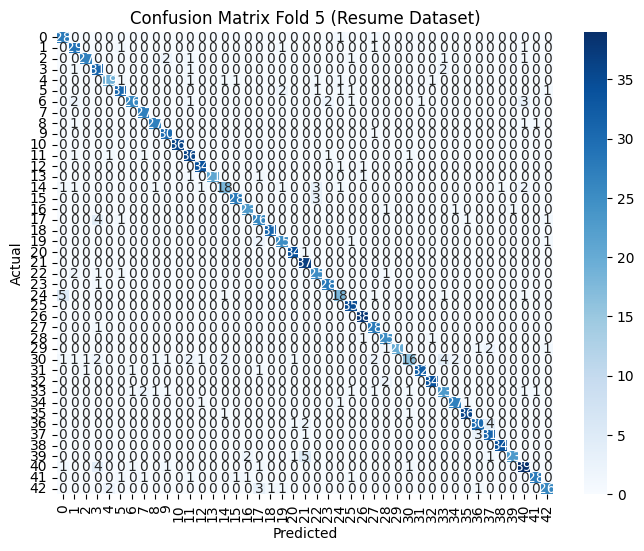


Fold 6
Accuracy : 0.8539
Precision: 0.8617
Recall   : 0.8539
F1-Score : 0.8505
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.65      0.97      0.78        32
           2       0.93      0.76      0.83        49
           3       0.66      0.68      0.67        28
           4       0.97      0.83      0.90        36
           5       0.92      0.81      0.86        27
           6       0.77      0.82      0.79        33
           7       0.78      1.00      0.88        28
           8       0.93      0.93      0.93        29
           9       0.82      0.93      0.88        30
          10       1.00      1.00      1.00        33
          11       0.85      0.97      0.91        35
          12       0.84      0.96      0.90        28
          13       0.91      0.88      0.89        33
          14       0.83      0.78      0.81        32
          15       0.93      0.88      0.90        42
 

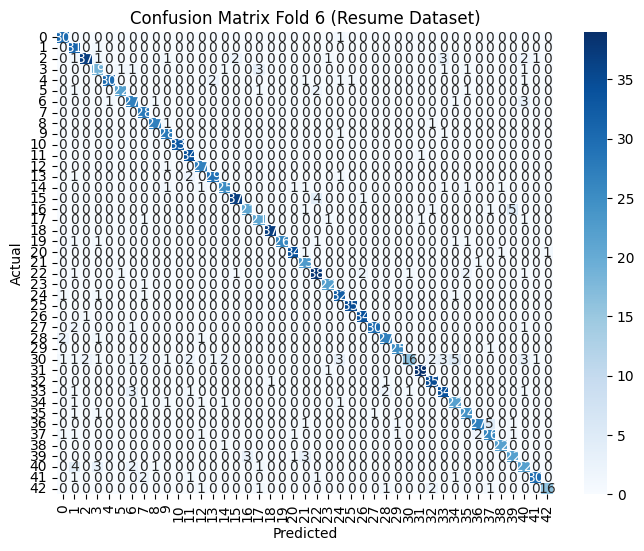


Fold 7
Accuracy : 0.8674
Precision: 0.8719
Recall   : 0.8674
F1-Score : 0.8666
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.74      0.78      0.76        36
           2       0.90      0.87      0.88        30
           3       0.79      0.80      0.80        41
           4       0.94      0.91      0.93        34
           5       0.74      0.87      0.80        30
           6       0.87      0.79      0.83        33
           7       0.83      0.94      0.88        32
           8       0.88      0.81      0.85        27
           9       0.87      0.89      0.88        38
          10       1.00      1.00      1.00        37
          11       0.93      0.86      0.89        29
          12       0.92      0.97      0.94        34
          13       0.91      0.81      0.86        26
          14       0.82      0.73      0.77        37
          15       0.93      0.90      0.91        29
 

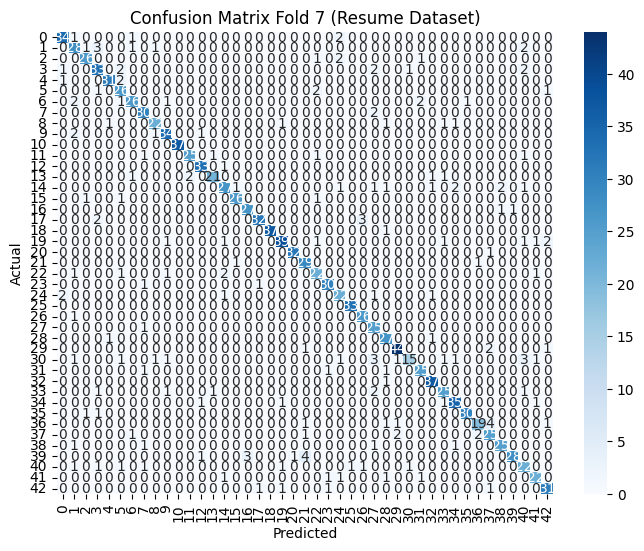


Fold 8
Accuracy : 0.8553
Precision: 0.8582
Recall   : 0.8553
F1-Score : 0.8529
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       0.70      0.82      0.76        38
           2       0.79      0.87      0.83        31
           3       0.76      0.82      0.78        38
           4       0.88      0.95      0.91        22
           5       0.84      0.79      0.81        33
           6       0.72      0.58      0.64        31
           7       0.94      0.91      0.93        34
           8       0.94      0.97      0.96        33
           9       0.88      0.95      0.91        38
          10       1.00      1.00      1.00        26
          11       0.76      0.79      0.77        28
          12       0.88      0.94      0.91        31
          13       0.94      0.92      0.93        37
          14       0.95      0.69      0.80        29
          15       0.97      0.89      0.93        36
 

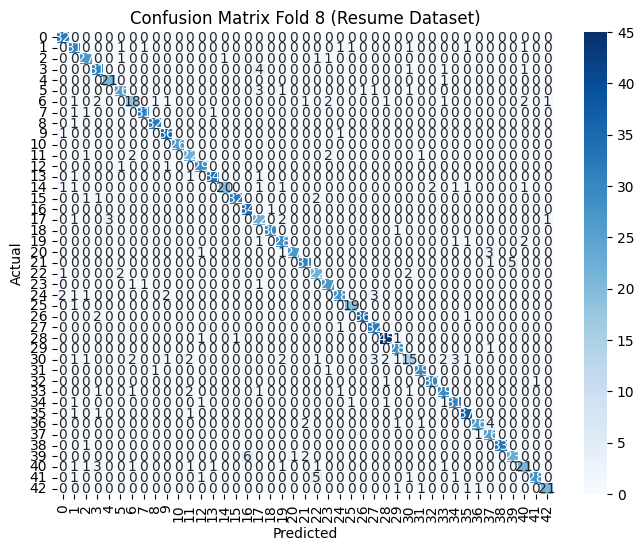


Fold 9
Accuracy : 0.8638
Precision: 0.8675
Recall   : 0.8638
F1-Score : 0.8621
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        34
           1       0.97      0.84      0.90        38
           2       0.60      0.68      0.64        22
           3       0.65      0.73      0.69        33
           4       1.00      0.73      0.84        33
           5       0.86      0.89      0.87        27
           6       0.79      0.76      0.77        29
           7       0.79      0.91      0.85        33
           8       0.86      0.94      0.90        33
           9       0.74      0.96      0.84        24
          10       1.00      1.00      1.00        48
          11       0.94      0.82      0.88        39
          12       1.00      0.89      0.94        38
          13       0.97      0.91      0.94        32
          14       0.81      0.63      0.71        35
          15       0.96      0.69      0.80        32
 

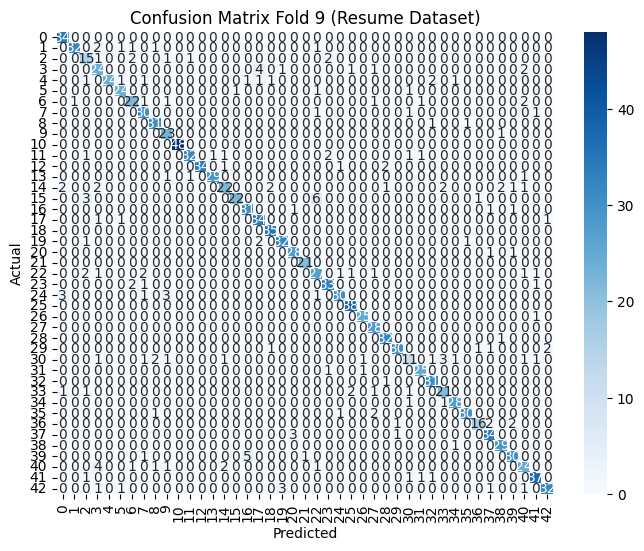


Fold 10
Accuracy : 0.8752
Precision: 0.8791
Recall   : 0.8752
F1-Score : 0.8744
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        31
           1       0.65      0.85      0.74        33
           2       0.85      0.74      0.79        31
           3       0.77      0.93      0.84        29
           4       0.96      0.76      0.85        33
           5       0.97      0.86      0.91        36
           6       0.92      0.70      0.79        33
           7       0.92      1.00      0.96        36
           8       1.00      0.88      0.94        42
           9       0.94      0.87      0.91        39
          10       1.00      1.00      1.00        31
          11       0.72      0.84      0.78        25
          12       0.88      0.93      0.90        30
          13       0.95      0.95      0.95        40
          14       0.69      0.67      0.68        33
          15       0.90      0.90      0.90        31


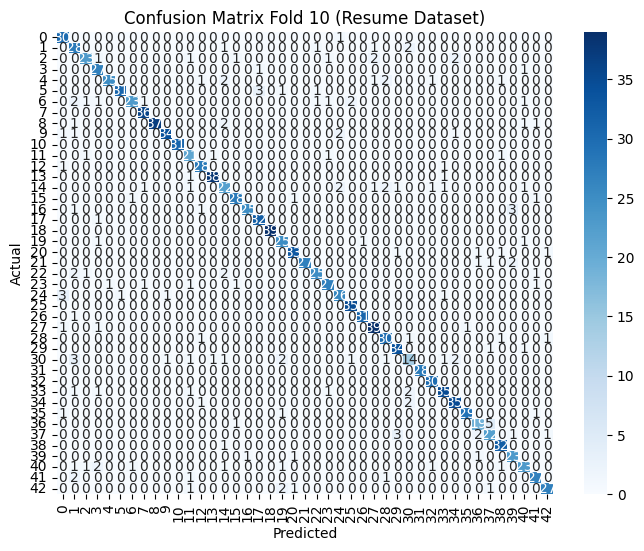


Optimal Accuracy for Resume Dataset: 0.8634
Classification Jobstreet Dataset

Fold 1
Accuracy : 0.9770
Precision: 0.9769
Recall   : 0.9770
F1-Score : 0.9768
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       783
           1       0.91      0.86      0.88       790
           2       1.00      1.00      1.00       771
           3       0.97      0.98      0.98       758
           4       1.00      1.00      1.00       802
           5       0.98      0.98      0.98       826
           6       0.99      1.00      0.99       815
           7       0.96      1.00      0.98       756
           8       1.00      0.99      0.99       783
           9       0.99      1.00      1.00       798
          10       0.99      0.99      0.99       811
          11       0.92      0.90      0.91       826
          12       1.00      1.00      1.00       764
          13       1.00      1.00      1.00       802
          14       1.00      1.

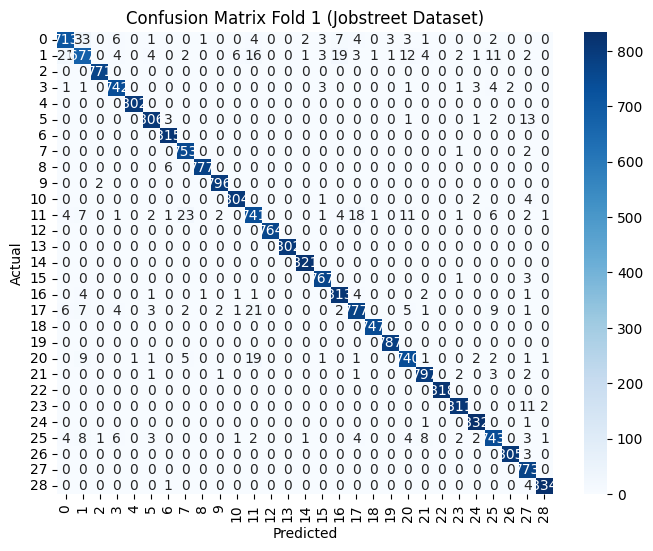


Fold 2
Accuracy : 0.9783
Precision: 0.9781
Recall   : 0.9783
F1-Score : 0.9781
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       810
           1       0.92      0.84      0.88       757
           2       0.99      1.00      1.00       787
           3       0.97      0.98      0.98       818
           4       1.00      1.00      1.00       775
           5       0.98      0.97      0.98       778
           6       0.99      1.00      1.00       806
           7       0.98      1.00      0.99       812
           8       1.00      1.00      1.00       773
           9       1.00      0.99      0.99       793
          10       0.99      1.00      0.99       788
          11       0.91      0.89      0.90       758
          12       1.00      1.00      1.00       839
          13       1.00      1.00      1.00       772
          14       1.00      1.00      1.00       802
          15       0.98      0.99      0.99       795
 

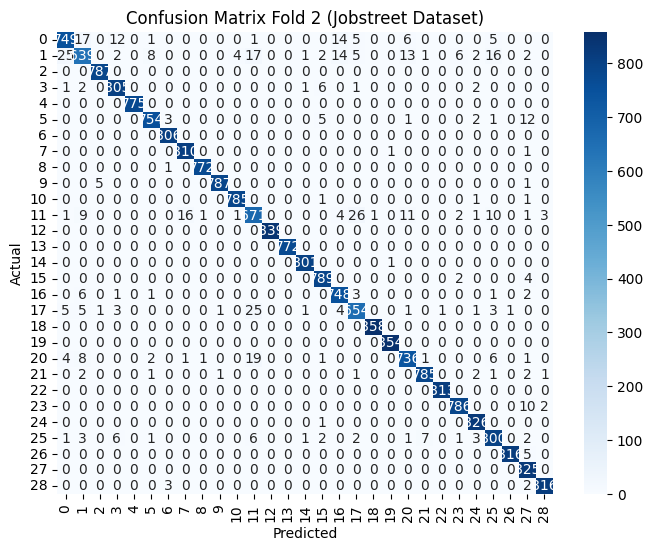


Fold 3
Accuracy : 0.9751
Precision: 0.9749
Recall   : 0.9751
F1-Score : 0.9748
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       791
           1       0.91      0.83      0.87       806
           2       1.00      0.99      1.00       764
           3       0.97      0.98      0.98       812
           4       1.00      1.00      1.00       833
           5       0.98      0.98      0.98       816
           6       0.99      1.00      0.99       784
           7       0.97      1.00      0.98       783
           8       1.00      0.99      1.00       843
           9       0.98      1.00      0.99       808
          10       0.99      0.99      0.99       795
          11       0.94      0.88      0.91       825
          12       1.00      1.00      1.00       803
          13       1.00      1.00      1.00       797
          14       1.00      1.00      1.00       811
          15       0.99      0.99      0.99       806
 

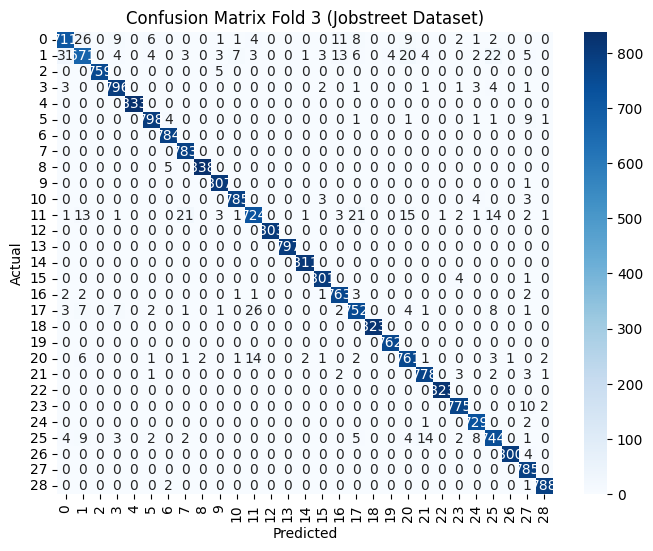


Fold 4
Accuracy : 0.9793
Precision: 0.9792
Recall   : 0.9793
F1-Score : 0.9791
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       804
           1       0.94      0.88      0.91       805
           2       0.99      1.00      0.99       809
           3       0.97      0.98      0.98       792
           4       1.00      1.00      1.00       775
           5       0.98      0.97      0.98       801
           6       0.99      1.00      1.00       795
           7       0.98      0.99      0.98       786
           8       1.00      1.00      1.00       785
           9       0.99      0.99      0.99       813
          10       0.99      0.99      0.99       796
          11       0.93      0.91      0.92       787
          12       1.00      1.00      1.00       783
          13       1.00      1.00      1.00       824
          14       1.00      0.99      0.99       767
          15       0.98      0.99      0.98       786
 

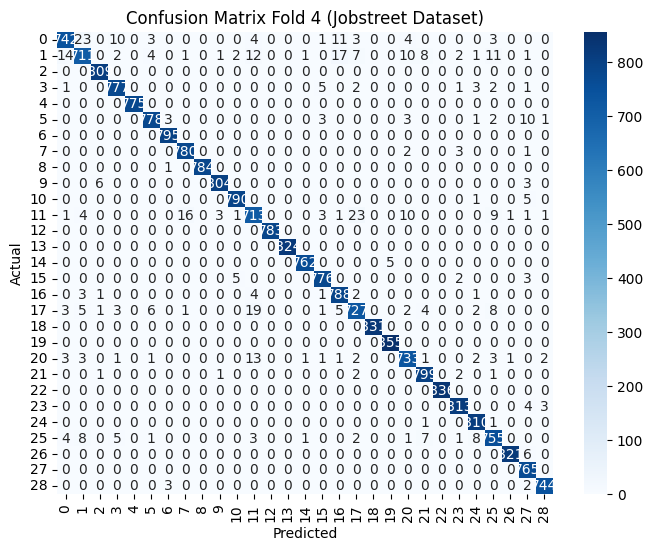


Fold 5
Accuracy : 0.9783
Precision: 0.9781
Recall   : 0.9783
F1-Score : 0.9781
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       804
           1       0.92      0.86      0.89       788
           2       1.00      0.99      1.00       791
           3       0.96      0.98      0.97       789
           4       1.00      1.00      1.00       827
           5       0.99      0.98      0.98       821
           6       0.99      1.00      0.99       794
           7       0.98      1.00      0.99       813
           8       0.99      1.00      1.00       763
           9       0.99      1.00      0.99       766
          10       0.99      0.99      0.99       804
          11       0.92      0.93      0.92       756
          12       1.00      1.00      1.00       817
          13       1.00      1.00      1.00       792
          14       1.00      1.00      1.00       801
          15       0.98      1.00      0.99       771
 

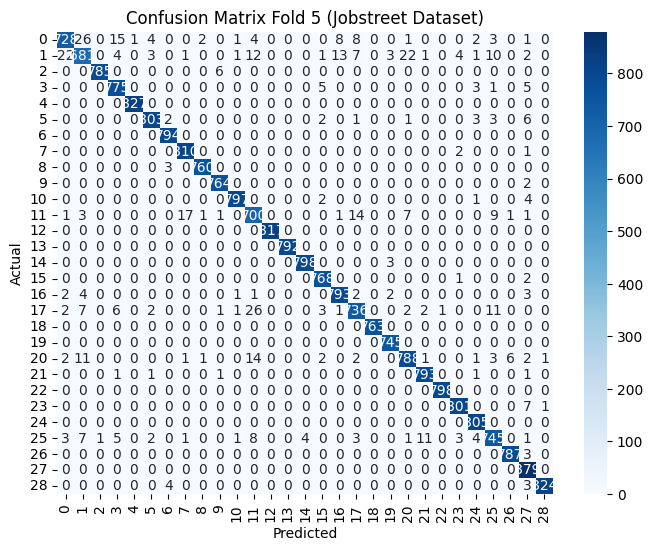


Fold 6
Accuracy : 0.9773
Precision: 0.9771
Recall   : 0.9773
F1-Score : 0.9770
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       825
           1       0.92      0.85      0.89       823
           2       0.99      1.00      1.00       832
           3       0.98      0.99      0.98       771
           4       1.00      1.00      1.00       842
           5       0.97      0.98      0.97       774
           6       0.99      1.00      1.00       788
           7       0.97      1.00      0.99       770
           8       1.00      1.00      1.00       771
           9       0.99      0.99      0.99       819
          10       1.00      0.99      0.99       811
          11       0.94      0.90      0.92       812
          12       1.00      1.00      1.00       789
          13       1.00      1.00      1.00       785
          14       1.00      1.00      1.00       790
          15       0.98      1.00      0.99       815
 

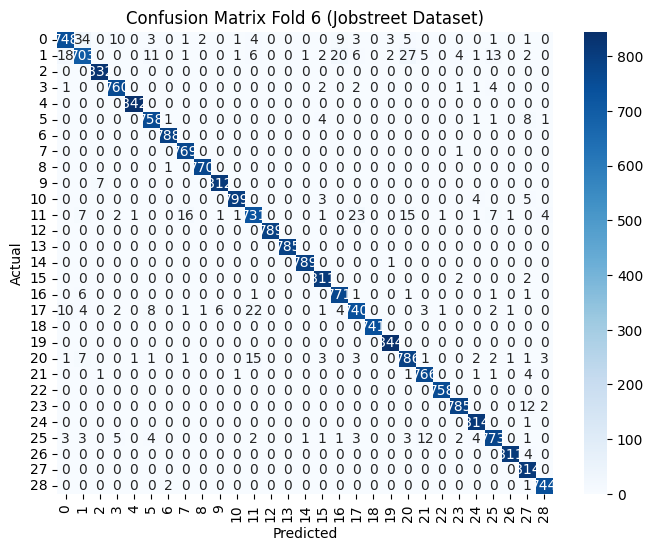


Fold 7
Accuracy : 0.9769
Precision: 0.9767
Recall   : 0.9769
F1-Score : 0.9766
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       759
           1       0.94      0.83      0.88       854
           2       1.00      0.99      1.00       817
           3       0.98      0.98      0.98       806
           4       1.00      1.00      1.00       776
           5       0.96      0.98      0.97       804
           6       0.99      1.00      0.99       780
           7       0.97      1.00      0.98       794
           8       1.00      0.99      1.00       850
           9       0.98      1.00      0.99       766
          10       0.98      0.99      0.99       779
          11       0.92      0.91      0.92       815
          12       1.00      1.00      1.00       800
          13       1.00      1.00      1.00       810
          14       1.00      1.00      1.00       811
          15       0.98      0.99      0.99       784
 

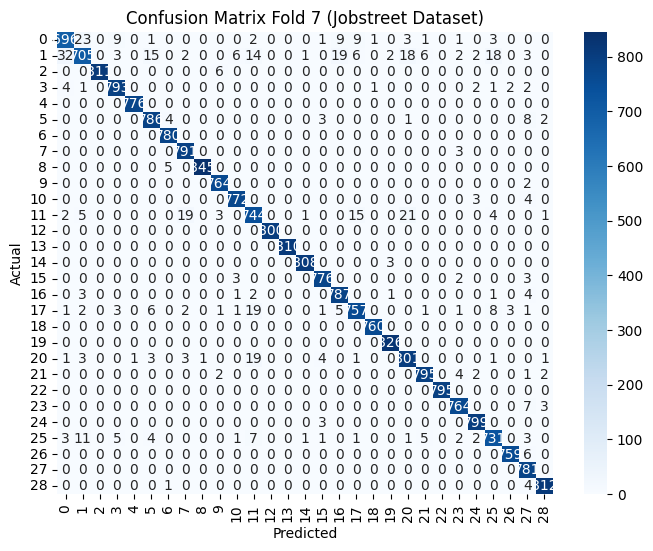


Fold 8
Accuracy : 0.9766
Precision: 0.9763
Recall   : 0.9766
F1-Score : 0.9763
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       792
           1       0.91      0.85      0.88       803
           2       1.00      1.00      1.00       829
           3       0.97      0.99      0.98       829
           4       1.00      1.00      1.00       782
           5       0.98      0.97      0.97       772
           6       0.99      1.00      1.00       815
           7       0.97      0.99      0.98       801
           8       1.00      1.00      1.00       815
           9       0.99      1.00      0.99       798
          10       0.99      0.99      0.99       767
          11       0.92      0.88      0.90       783
          12       1.00      1.00      1.00       806
          13       1.00      1.00      1.00       795
          14       0.99      1.00      0.99       783
          15       0.99      1.00      0.99       804
 

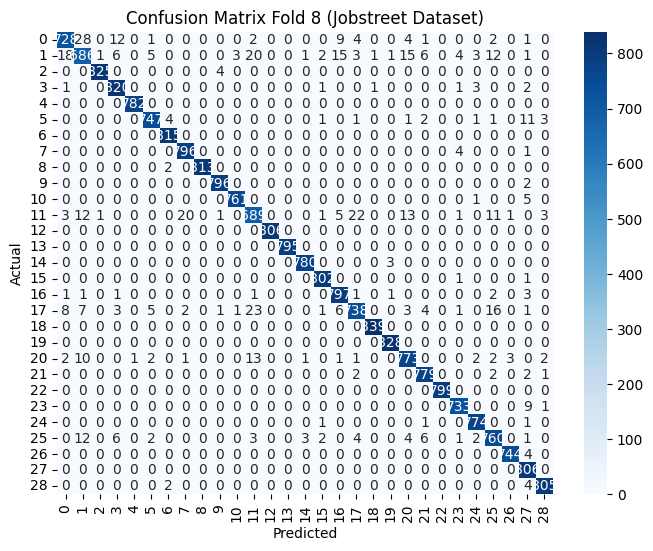


Fold 9
Accuracy : 0.9777
Precision: 0.9775
Recall   : 0.9777
F1-Score : 0.9775
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       798
           1       0.91      0.87      0.89       748
           2       0.99      1.00      0.99       789
           3       0.98      0.99      0.98       836
           4       1.00      1.00      1.00       793
           5       0.98      0.96      0.97       819
           6       0.98      1.00      0.99       787
           7       0.98      1.00      0.99       850
           8       1.00      1.00      1.00       819
           9       0.99      0.99      0.99       827
          10       1.00      0.99      1.00       830
          11       0.92      0.91      0.92       799
          12       1.00      1.00      1.00       780
          13       1.00      1.00      1.00       801
          14       0.99      1.00      1.00       767
          15       0.98      0.99      0.98       837
 

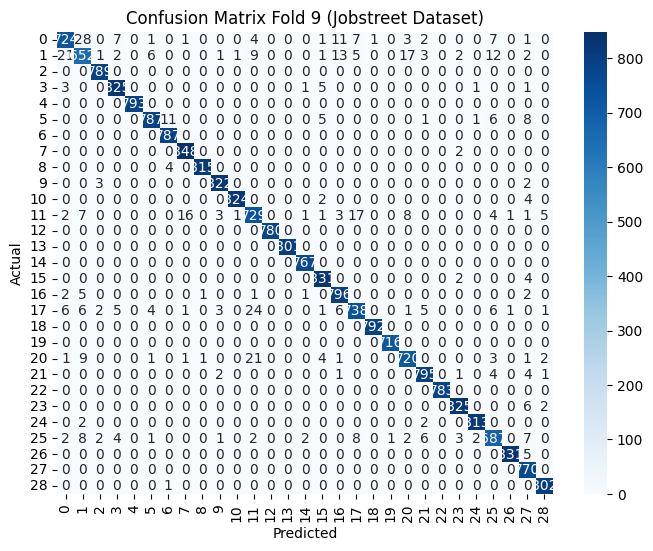


Fold 10
Accuracy : 0.9765
Precision: 0.9763
Recall   : 0.9765
F1-Score : 0.9763
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       820
           1       0.90      0.85      0.88       812
           2       1.00      0.99      1.00       797
           3       0.97      0.98      0.97       775
           4       1.00      1.00      1.00       781
           5       0.97      0.98      0.98       775
           6       0.99      1.00      0.99       822
           7       0.97      0.99      0.98       821
           8       1.00      0.99      0.99       784
           9       0.99      1.00      0.99       798
          10       0.99      0.99      0.99       805
          11       0.93      0.91      0.92       825
          12       1.00      1.00      1.00       805
          13       1.00      1.00      1.00       808
          14       1.00      1.00      1.00       833
          15       0.98      0.99      0.98       817


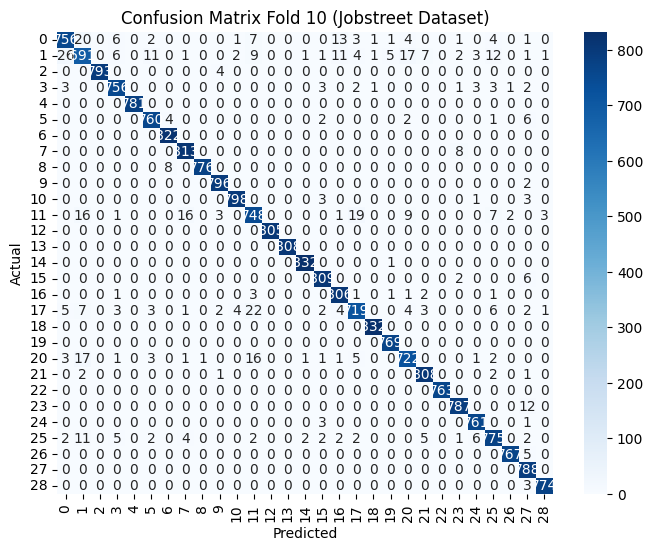


Optimal Accuracy for Jobstreet Dataset: 0.9773


In [31]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

print("Classification Resume Dataset")
cv_df1 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies_df1 = []

for fold_idx, (train_idx, test_idx) in enumerate(cv_df1.split(X_resampled_df1, y_resampled_df1)):
    X_train, X_test = X_resampled_df1.iloc[train_idx], X_resampled_df1.iloc[test_idx]
    y_train, y_test = y_resampled_df1.iloc[train_idx], y_resampled_df1.iloc[test_idx]

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = (y_pred == y_test).mean()
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1 = report["weighted avg"]["f1-score"]

    fold_accuracies_df1.append(accuracy)

    print(f"\nFold {fold_idx + 1}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_resampled_df1),
                yticklabels=np.unique(y_resampled_df1))
    plt.title(f'Confusion Matrix Fold {fold_idx + 1} (Resume Dataset)')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Mean accuracy
mean_accuracy_df1 = np.mean(fold_accuracies_df1)
print(f"\nOptimal Accuracy for Resume Dataset: {mean_accuracy_df1:.4f}")

print("Classification Jobstreet Dataset")
cv_df2 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies_df2 = []

for fold_idx, (train_idx, test_idx) in enumerate(cv_df2.split(X_resampled_df2, y_resampled_df2)):
    X_train, X_test = X_resampled_df2.iloc[train_idx], X_resampled_df2.iloc[test_idx]
    y_train, y_test = y_resampled_df2.iloc[train_idx], y_resampled_df2.iloc[test_idx]

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = (y_pred == y_test).mean()
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1 = report["weighted avg"]["f1-score"]

    fold_accuracies_df2.append(accuracy)

    print(f"\nFold {fold_idx + 1}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_resampled_df2),
                yticklabels=np.unique(y_resampled_df2))
    plt.title(f'Confusion Matrix Fold {fold_idx + 1} (Jobstreet Dataset)')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Mean accuracy
mean_accuracy_df2 = np.mean(fold_accuracies_df2)
print(f"\nOptimal Accuracy for Jobstreet Dataset: {mean_accuracy_df2:.4f}")

# MODELLING NAIVE BAYES

In [32]:
# Initialize Naive Bayes model
nb = MultinomialNB()

print("Classification Resume Dataset")
best_classification_report_df1 = None
mean_scores_df1 = []

cv_df1 = KFold(n_splits=10, shuffle=True, random_state=42)

fold_reports_df1 = []
fold_conf_matrices_df1 = []
fold_accuracies_df1 = []
fold_precision_df1 = []
fold_recall_df1 = []
fold_f1_df1 = []

for fold_idx, (train_idx, test_idx) in enumerate(cv_df1.split(X_resampled_df1, y_resampled_df1)):
    X_train, X_test = X_resampled_df1.iloc[train_idx], X_resampled_df1.iloc[test_idx]
    y_train, y_test = y_resampled_df1.iloc[train_idx], y_resampled_df1.iloc[test_idx]

    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)

    acc = (y_pred == y_test).mean()
    fold_accuracies_df1.append(acc)

    report = classification_report(y_test, y_pred, output_dict=True)
    fold_reports_df1.append(report)

    # Store metrics
    fold_precision_df1.append(report['macro avg']['precision'])
    fold_recall_df1.append(report['macro avg']['recall'])
    fold_f1_df1.append(report['macro avg']['f1-score'])

    print(f"\n Fold {fold_idx + 1}:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {report['macro avg']['precision']:.4f}")
    print(f"  Recall   : {report['macro avg']['recall']:.4f}")
    print(f"  F1-Score : {report['macro avg']['f1-score']:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    fold_conf_matrices_df1.append(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_resampled_df1),
                yticklabels=np.unique(y_resampled_df1))
    plt.title(f'Confusion Matrix for Fold {fold_idx + 1} (Resume Dataset)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Resume dataset summary
optimal_accuracy_df1 = np.mean(fold_accuracies_df1)
mean_scores_df1.append(optimal_accuracy_df1)
best_accuracy_df1 = max(fold_accuracies_df1)
best_classification_report_df1 = fold_reports_df1[fold_accuracies_df1.index(best_accuracy_df1)]

print("Resume Dataset Final Summary")
print(f"Optimal Accuracy : {optimal_accuracy_df1:.4f}")
print(f"Mean Precision   : {np.mean(fold_precision_df1):.4f}")
print(f"Mean Recall      : {np.mean(fold_recall_df1):.4f}")
print(f"Mean F1-Score    : {np.mean(fold_f1_df1):.4f}")
print("\nBest Classification Report:")
print(classification_report(y_resampled_df1, nb.predict(X_resampled_df1)))


print("Jobstreet Dataset")
best_classification_report_df2 = None
mean_scores_df2 = []

cv_df2 = KFold(n_splits=10, shuffle=True, random_state=42)

fold_reports_df2 = []
fold_conf_matrices_df2 = []
fold_accuracies_df2 = []
fold_precision_df2 = []
fold_recall_df2 = []
fold_f1_df2 = []

for fold_idx, (train_idx, test_idx) in enumerate(cv_df2.split(X_resampled_df2, y_resampled_df2)):
    X_train, X_test = X_resampled_df2.iloc[train_idx], X_resampled_df2.iloc[test_idx]
    y_train, y_test = y_resampled_df2.iloc[train_idx], y_resampled_df2.iloc[test_idx]

    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)

    acc = (y_pred == y_test).mean()
    fold_accuracies_df2.append(acc)

    report = classification_report(y_test, y_pred, output_dict=True)
    fold_reports_df2.append(report)

    # Store metrics
    fold_precision_df2.append(report['macro avg']['precision'])
    fold_recall_df2.append(report['macro avg']['recall'])
    fold_f1_df2.append(report['macro avg']['f1-score'])

    print(f"Fold {fold_idx + 1}:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {report['macro avg']['precision']:.4f}")
    print(f"  Recall   : {report['macro avg']['recall']:.4f}")
    print(f"  F1-Score : {report['macro avg']['f1-score']:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    fold_conf_matrices_df2.append(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_resampled_df2),
                yticklabels=np.unique(y_resampled_df2))
    plt.title(f'Confusion Matrix for Fold {fold_idx + 1} (Jobstreet Dataset)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Job Description dataset summary
optimal_accuracy_df2 = np.mean(fold_accuracies_df2)
mean_scores_df2.append(optimal_accuracy_df2)
best_accuracy_df2 = max(fold_accuracies_df2)
best_classification_report_df2 = fold_reports_df2[fold_accuracies_df2.index(best_accuracy_df2)]

print("Jobstreet Dataset Dataset Final Summary")
print(f"Optimal Accuracy : {optimal_accuracy_df2:.4f}")
print(f"Mean Precision   : {np.mean(fold_precision_df2):.4f}")
print(f"Mean Recall      : {np.mean(fold_recall_df2):.4f}")
print(f"Mean F1-Score    : {np.mean(fold_f1_df2):.4f}")
print("\nBest Classification Report:")
print(classification_report(y_resampled_df2, nb.predict(X_resampled_df2)))

Output hidden; open in https://colab.research.google.com to view.

# FINAL MODELLING

In [33]:
# Train final model using optimal_k on resampled data
final_model = RandomForestClassifier(random_state=42)

# Choose either df1 or df2 resampled data
X_resampled = X_resampled_df1  # or X_resampled_df2
y_resampled = y_resampled_df1  # or y_resampled_df2

final_model.fit(X_resampled, y_resampled)

# Make predictions on test set (X_test_selected_df)
# Make sure to use the corresponding test set (X_test_selected_df1 or X_test_selected_df2)
y_pred = final_model.predict(X_test_selected_df1)  # or X_test_selected_df2

# Make sure to use the corresponding test labels (y_test_df1 or y_test_df2)
print("Accuracy:", accuracy_score(y_test_df1.values.ravel(), y_pred))  # or y_test_df2
print("\nClassification Report:\n", classification_report(y_test_df1.values.ravel(), y_pred))  # or y_test_df2

Accuracy: 0.08177744585511576

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.09      0.14        70
           1       0.02      0.09      0.03        58
           2       0.03      0.31      0.06        59
           3       0.16      0.19      0.17        64
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        66
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00        68
           8       0.02      0.05      0.03        40
           9       0.67      0.03      0.06        63
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00        69
          12       0.04      0.10      0.06        68
          13       0.00      0.00      0.00        73
          14       0.04      0.19      0.07        74
          15       0.05      0.02      0.03        60
          16       0.00   

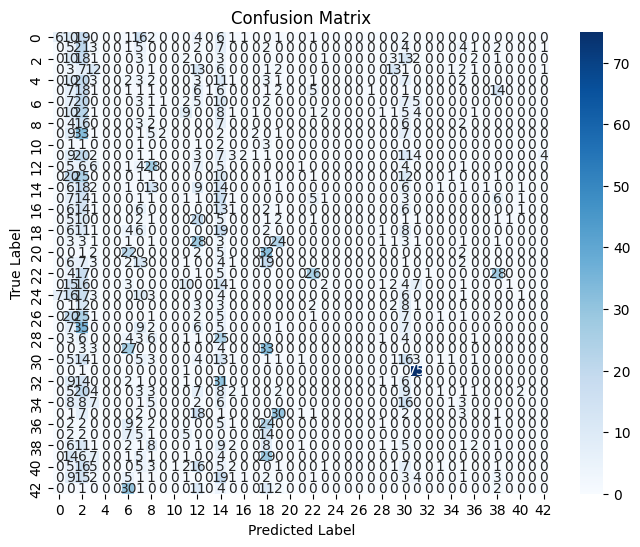

In [34]:
# Assuming you are using y_test_df1 for the confusion matrix
cm = confusion_matrix(y_test_df1.values.ravel(), y_pred)

# Step 7: Visualize Confusion Matrix using Seaborn Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# TESTING

In [35]:
new_data = test_set.iloc[:20]['lemma_descriptions'].to_list()
answers = test_set.iloc[:20]['category_encoded'].to_list()

In [36]:
# tfidf
new_data_tfidf = pd.DataFrame(vectorizer.transform(new_data).toarray(), columns=vectorizer.get_feature_names_out())

# feature selection
# Use the SAME mask used during training (mask_df1 or mask_df2, depending on your choice)
# AND make sure all columns from training data are present in new_data_selected, filling with 0 if necessary
new_data_selected = new_data_tfidf.reindex(columns=selected_features_df1, fill_value=0) # Assuming you trained on df1 data

# prediction
new_data_prediction = final_model.predict(new_data_selected)

# Get the label encoder used during training for df1 or df2
# (Assuming label_encoder_df1 was used for df1 and label_encoder for df2)
label_encoder_for_prediction = label_encoder_df1  # Change to label_encoder if you trained on df2

print(f"Correct Predictions: {(sum(new_data_prediction == answers)/len(answers)*100)}%\n")
for answer, prediction in zip(answers, new_data_prediction):
    # Check if the prediction is within the known classes of the label encoder
    if prediction in label_encoder_for_prediction.classes_:
        print(f" - Answer: {label_encoder_for_prediction.inverse_transform([answer])} | Prediction: {label_encoder_for_prediction.inverse_transform([prediction])}")
    else:
        print(f" - Answer: {label_encoder_for_prediction.inverse_transform([answer])} | Prediction: Unknown Category ({prediction})")

Correct Predictions: 15.0%

 - Answer: ['Accountant'] | Prediction: Unknown Category (0)
 - Answer: ['Accountant'] | Prediction: Unknown Category (14)
 - Answer: ['Database'] | Prediction: Unknown Category (7)
 - Answer: ['Accountant'] | Prediction: Unknown Category (32)
 - Answer: ['Designing'] | Prediction: Unknown Category (14)
 - Answer: ['Building and Construction'] | Prediction: Unknown Category (21)
 - Answer: ['ETL Developer'] | Prediction: Unknown Category (12)
 - Answer: ['Accountant'] | Prediction: Unknown Category (17)
 - Answer: ['Accountant'] | Prediction: Unknown Category (0)
 - Answer: ['Database'] | Prediction: Unknown Category (36)
 - Answer: ['Accountant'] | Prediction: Unknown Category (2)
 - Answer: ['Advocate'] | Prediction: Unknown Category (17)
 - Answer: ['Accountant'] | Prediction: Unknown Category (0)
 - Answer: ['Advocate'] | Prediction: Unknown Category (23)
 - Answer: ['Finance'] | Prediction: Unknown Category (31)
 - Answer: ['Banking'] | Prediction: Unkn

# FILE TESTING

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt')  # Download necessary NLTK data

# File upload
uploaded = files.upload()

# Limit to a maximum of 5 files
max_files = 5
uploaded_files = list(uploaded.keys())[:max_files]

# Loop through each file
for filename in uploaded_files:
    with open(filename, 'r') as file:
        user_resume = file.read()

    # Normalization
    normalized_resume = normalize_text(user_resume)

    # Remove stopwords
    rm_resume = remove_stopwords(normalized_resume)

    # Lemmatization
    lemma_resume = lemmatize_text(rm_resume)

    # TF-IDF
    resume_tfidf = pd.DataFrame(vectorizer.transform([lemma_resume]).toarray(), columns=vectorizer.get_feature_names_out())

    # Feature selection
    resume_selected = resume_tfidf.loc[:, mask_selected_features]

    # Prediction
    resume_prediction = final_model.predict(resume_selected)
    user_prediction_proba = final_model.predict_proba(resume_selected)
    class_labels = final_model.classes_

    # Output probabilities and final prediction for each file
    print(f"\n\nResults for File: {filename}")
    print("\nPredicted Category for the User Input Resume (with probabilities):")
    for label, proba in zip(class_labels, user_prediction_proba[0]):
        print(f"- {label_encoder.inverse_transform([label])[0]}: {proba:.2%}")

    print(f"Final Category Prediction: {label_encoder.inverse_transform(resume_prediction)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# ===== Fungsi Preprocessing =====
def normalize_text(text):
    # Normalisasi teks (contoh, bisa ditambahkan sesuai kebutuhan)
    return text.lower()

def remove_stopwords(text):
    # Tokenisasi kata
    words = word_tokenize(text)
    # Gabungkan stopwords Bahasa Inggris dan Indonesia
    stop_words = set(stopwords.words('english') + stopwords.words('indonesian'))
    # Hapus stopwords dan tanda baca
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]
    return ' '.join(filtered_words)

def lemmatize_text(text):
    # Lakukan lemmatization (contoh, bisa menggunakan nltk atau library lain)
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# ===== Upload dan Batasi File =====
uploaded = files.upload()
max_files = 5
uploaded_files = list(uploaded.items())[:max_files]

# ===== Fungsi Preprocessing dan Prediksi =====
for filename, file in uploaded_files:
    try:
        # Baca file dan preprocessing
        user_resume = file.decode('utf-8')

        # Preprocessing teks
        normalized_resume = normalize_text(user_resume)
        rm_resume = remove_stopwords(normalized_resume)
        lemma_resume = lemmatize_text(rm_resume)

        # TF-IDF Vectorization
        resume_tfidf = pd.DataFrame(
            vectorizer.transform([lemma_resume]).toarray(),
            columns=vectorizer.get_feature_names_out()
        )

        # Feature Selection
        resume_selected = resume_tfidf.loc[:, mask_selected_features]

        # Prediksi dan Probabilitas
        resume_prediction = final_model.predict(resume_selected)
        user_prediction_proba = final_model.predict_proba(resume_selected)
        class_labels = final_model.classes_

        # Tampilkan Hasil
        print(f"\n\nResults for File: {filename}")
        print("\nPredicted Category with Probabilities:")
        for label, proba in zip(class_labels, user_prediction_proba[0]):
            label_name = label_encoder.inverse_transform([label])[0]
            print(f"- {label_name}: {proba:.2%}")
        final_label = label_encoder.inverse_transform(resume_prediction)[0]
        print(f"Final Category Prediction: {final_label}")

    except Exception as e:
        print(f"Error processing file {filename}: {e}")